# Tutorial
**Example file: High stats measurement of Ga-62**

The following pages show an example analysis with emgfit broken down into the essential steps. Many of the more advanced features of emgfit are left out or only briefly mentioned in passing, so feel free to explore the documentation further!  

This tutorial was created in the Jupyter Notebook `emgfit_tutorial.ipynb` which can be found in the folder`emgfit/examples/tutorial/`. Feel free to copy the tutorial folder to a different directory (outside of the `emgfit/` directory!) and follow along with the tutorial by actually running the code. You can also use this notebook as a template for your own analyses (consider removing some of the explanations). It is recommended to use a separate notebook for each spectrum to be fitted. This enables you to go back to the notebook at any time and check on all the details of how the fits were performed. 

emgfit is optimized to be run within Jupyter Notebooks. There is dozens of decent introductions to using Jupyter Notebooks, a nice overview can e.g. be found at https://realpython.com/jupyter-notebook-introduction/. Naturally, the first step of an analysis with emgfit is starting up your notebook server by running ``jupyter notebook`` in your command-line interface. This should automatically make the Jupyter interface pop up in a browser window. From there you can navigate to different directories and create a new notebook (`new` panel on the top right) or open an existing notebook (.ipynb files).

## Import the package
In your notebook the first step will be importing the emgfit package. In order for Python to find emgfit on your system you must add the parent directory of emgfit to your `PYTHONPATH` user variable. 

In [14]:
### Import fit package 
import emgfit as emg

## How to access the documentation 
Before we actually start processing a spectrum it is important to know how to get access to emgfit's documentation. There is multiple options for this:

1. The **html documentation** located in the `emgfit/docs/build/` directory can be viewed in any browser. It contains usage examples, detailed explanations of the crucial components and API docs with the different modules and all their methods. The search option and cross references enable quick and easy browsing for help.
2. Once you have imported emgfit you can **access the docs directly from the Jupyter Notebook**:
    * print all available methods of e.g. the spectrum class by running `dir(emg.spectrum)` 
    * print documentation of a method using `help()`, e.g. the docs of the `add_peak` method are printed by running `help(emg.spectrum.add_peak)` in a code cell
    * keyboard shortcuts can be even more convenient:
        * Use `TAB` to get suggestions for auto-completion of method and variable names
        * Place the cursor inside the brackets of a function/method and press `SHIFT` + `TAB` to have a window with the     function/method documention pop up
        * Pressing the `H` key inside a Jupyter Notebook shows you all available keyboard shortcuts)

## Import data 
The following code imports the mass data and creates an emgfit spectrum object called `spec`. The input file must be a TXT or CSV-file following the format of MAc's hist export mode. From here on the analysis of the spectrum proceeds by calling the various methods on our spectrum object `spec`.

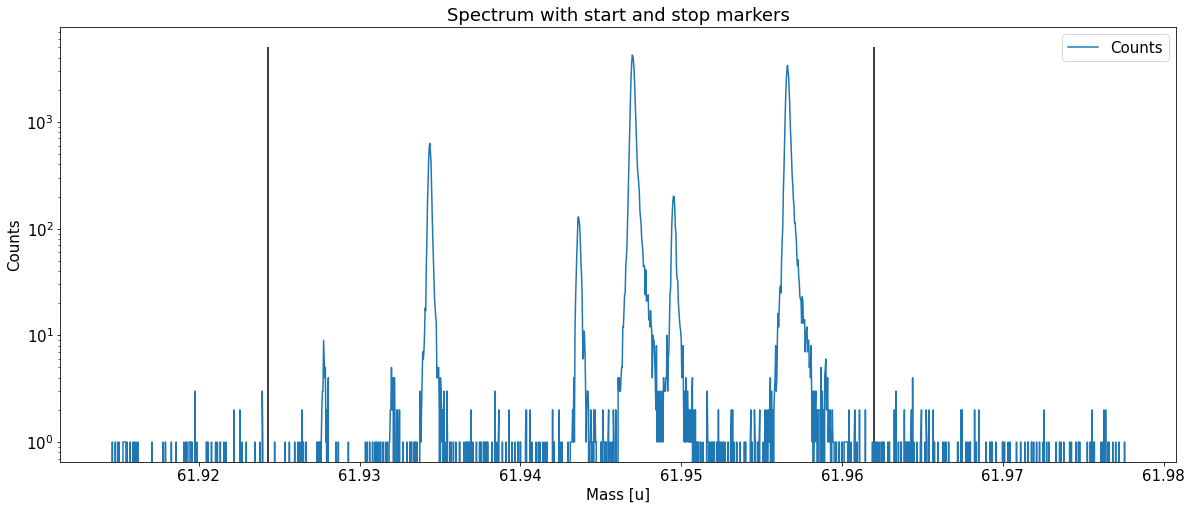

In [15]:
### Import mass data, plot full spectrum and indicate chosen fit range
filename = "2019-09-13_004-_006 SUMMED High stats 62Ga"
skiprows = 38 # number of header rows to skip upon data import
m_start = 61.9243 # low-mass cut off
m_stop = 61.962 # high-mass cut off

spec = emg.spectrum(filename+'.txt',m_start,m_stop,skiprows=skiprows)

## Add peaks to the spectrum 
This can be done with the automatic peak detection spectrum method) and/or by manually adding peaks (add_peak spectrum method). The plots shown below are (optional) outputs of the `detect_peaks()` method and depicts the different stages of the automatic peak detection.

All information about the peaks associated with the spectrum are compiled in the peak properties table. The table's left-most column shows the respective peak indeces. In all fits, the peaks' `x_pos` will be used as the initial values for the peak centroid parameters `mu` (to be exact: `mu` marks the centroid of the underlying Gaussians). 

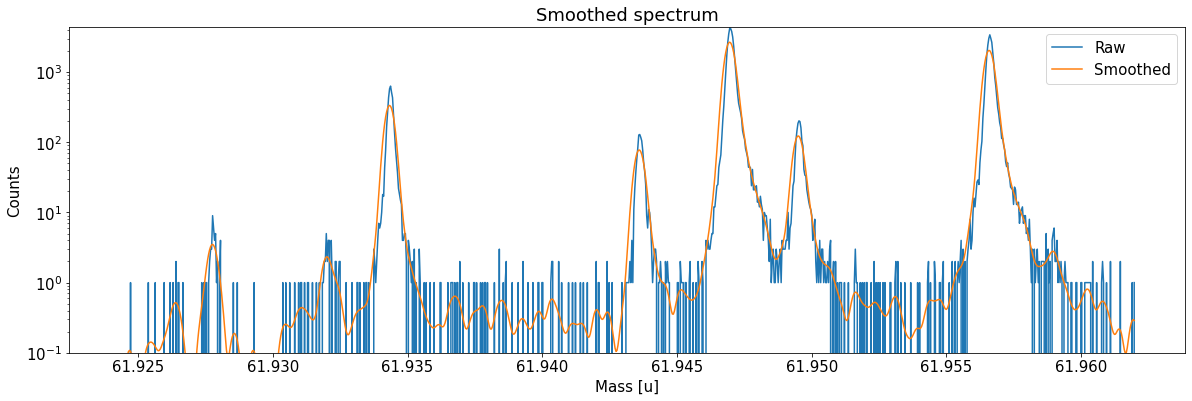

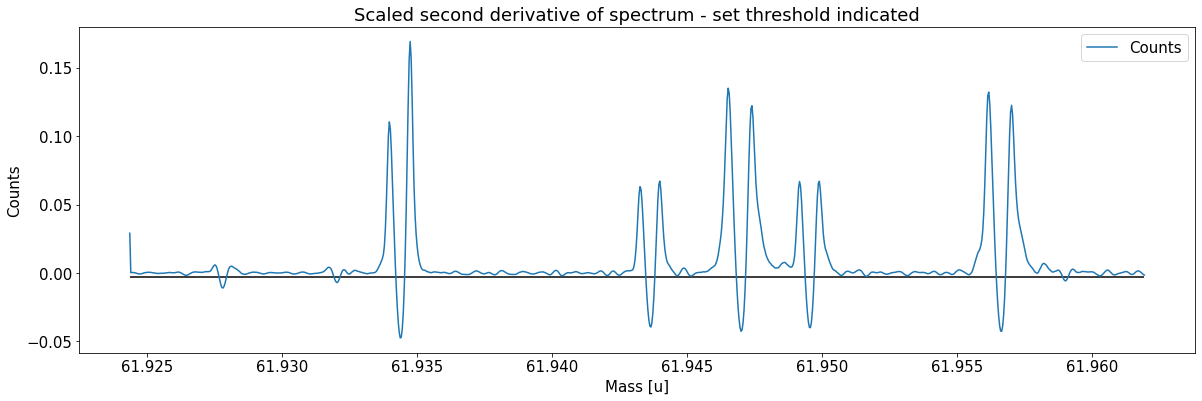

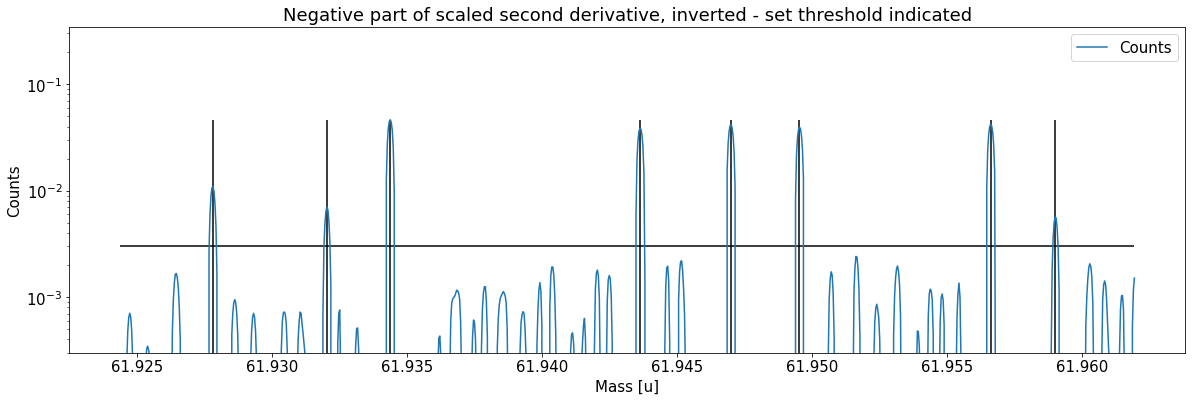

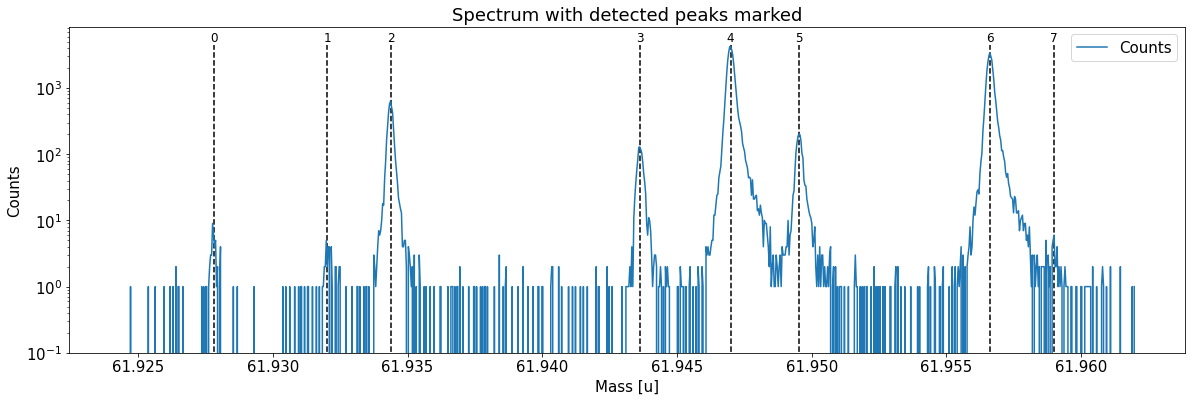

Peak properties table after peak detection:


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,61.932021,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,61.934369,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,61.943618,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,61.946994,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,61.949527,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,61.956611,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,61.958997,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [16]:
### Detect peaks and add them to spectrum object 'spec'
spec.detect_peaks() # automatic peak detection
#spec.add_peak(61.925,species='?') # manually add a peak at x_pos = 61.925u
#spec.remove_peak(peak_index=0) # manually remove the peak with index 0 

## Assign identified species to the peaks (optional)
Although this step is optional, it is highly recommended that it is not skipped. By assigning species labels to your peaks you do not only gain more overview over your spectrum, but also allow for literature values to be automatically fetched from the AME database and entered into the peak properties table. Once a `species` label has been assigned, you can refer to this peak not only via its index but also via the label.

The `assign_species` method allows to assign species identifications either to a single selected peak or to all peaks at once. Here the second option was used by passing a list of species labels to `assign_species`. The list must have the same length as the number of peaks associated with the spectrum object. If there are peaks whose labels should not be changed (e.g. unidentified peaks), simply insert ``None`` as a placeholder at the corresponding spots (as done for peaks 2 and 7 below). The syntax for species labels follows MAc's :-Notation. **It is important not to forget to subtract the number of electrons corresponding to the ion's charge state!** Otherwise the analysis would mistakenly proceed with the atomic instead of the ionic mass. Note that currently only singly-charged species are supported by emgfit. Tentative peak identifications can be indicated by adding a ``'?'`` to the end of the species string. In this case the literature values are not fetched. The user can also define custom literature values (e.g. to handle isomers or if there are recent measurements that have not entered the AME yet). For more details see the documentation of ``assign_species``.   

This is also a good point in time to add any comments to the peaks using the `add_peak_comment` method. These comments can be particularly helpful for the post-processing in Excel since they are written into the output file with the fit results (as is the entire peak properties table). More general comments that concern the entire spectrum can instead be added with the `add_spectrum_comment` method. 

In [31]:
### Assign species and add peak comments
spec.assign_species(['Ni62:-1e','Cu62:-1e?',None,'Ga62:-1e','Ti46:O16:-1e','Sc46:O16:-1e','Ca43:F19:-1e',None])
spec.add_peak_comment('Non-isobaric',peak_index=2)
spec.show_peak_properties() # check the changes by printing the peak properties table

Species of peak 0 assigned as Ni62:-1e
Species of peak 1 assigned as Cu62:-1e?
Species of peak 3 assigned as Ga62:-1e
Species of peak 4 assigned as Ti46:O16:-1e
Species of peak 5 assigned as Sc46:O16:-1e
Species of peak 6 assigned as Ca43:F19:-1e
Comment of peak 2 was changed to:  Non-isobaricNon-isobaric


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,0.57,34.28,5.57,61.927803,4.201252e-07,1.364463e-08,3.363408e-08,4.216902e-07,62.0,-66740.226,24.325358,6.103
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,MLE,0.57,25.16,5.57,61.932083,4.903586e-07,1.364463e-08,3.896354e-08,4.920934e-07,NaN,NaN,28.388556,NaN
2,61.934369,?,Non-isobaricNon-isobaric,NaN,NaN,False,emg22,MLE,0.57,3879.62,47.60,61.934370,3.948739e-08,1.364463e-08,1.705503e-08,4.512542e-08,NaN,NaN,2.603353,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,0.57,939.07,23.68,61.943636,8.024891e-08,1.364463e-08,1.113415e-08,8.215858e-08,62.0,-51992.089,4.740561,-5.177
4,61.946994,Ti46:O16:-1e,-,61.946993,1.760001e-07,False,emg22,MLE,0.57,33951.28,140.21,61.946993,1.334555e-08,1.364463e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,0.57,1542.61,30.25,61.949540,6.260639e-08,1.364463e-08,1.106218e-08,6.502390e-08,62.0,-46492.523,3.752245,5.702
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,0.57,25913.21,121.87,61.956622,1.527343e-08,1.364463e-08,2.667518e-09,2.065355e-08,62.0,-39895.648,1.191962,0.623
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,0.57,22.08,5.39,61.958978,5.232160e-07,1.364463e-08,1.512689e-07,5.448150e-07,NaN,NaN,31.443685,NaN


## Select the optimal fit model and perform the peak-shape calibration 
Next we need to find both a fit model and a set of model parameters that capture the shape of our peaks as well as possible. In emgfit both of this is achieved with the `determine_peak_shape` method. Once the peak-shape calibration has been performed all subsequent fits will be performed with this fixed peak-shape, by only varying the peak centroids, amplitudes and optionally the uniform-baseline parameter `bkd_c`.

By default `determine_peak_shape` performs an **automatic model selection** in which the shape-calibrant peak is first fitted with a pure Gaussian and then with Hyper-EMG functions with an increasing number of expontential tails on the left and right. The algorithm selects the fit model which yields the smallest $chi^2_{red}$ without having any of the tail weight parameters $\eta$ compatible with zero within their uncertainty. Alternatively, the auto-model selection can be turned off with the argument `vary_tail_order=False` and the fit model can be selected manually with the `fit_model` argument.

Once the best fit model has been selected the method proceeds with the determination of the peak-shape parameters and shows a detailed report with the fit results. 

Some recommendations:
* It is recommended to do the peak-shape calibration with a chi-squared fit (default) since this yields more robust results and more trusworthy parameter uncertainty estimates. Check the method docs for info on performing the shape calibration with binned maximum likelihood estimation.
* Ideally the peak-shape calibration is performed on a well-separated peak with high statistics. In this example, the `Ca43:F19:-1e` peak was selected as peak-shape calibrant. Since the default fit range includes a smaller peak on the right, the range was manually reduced to 0.45u with the `x_fit_range` argument. If unavoidable, the peak-shape determination can also be performed on partially overlapping peaks since emgfit ensures identical shape parameters for all peaks being fitted. 


##### Determine optimal tail order #####


##### Fitting data with Gaussian #####-----------------------------------------------------------------------------------------



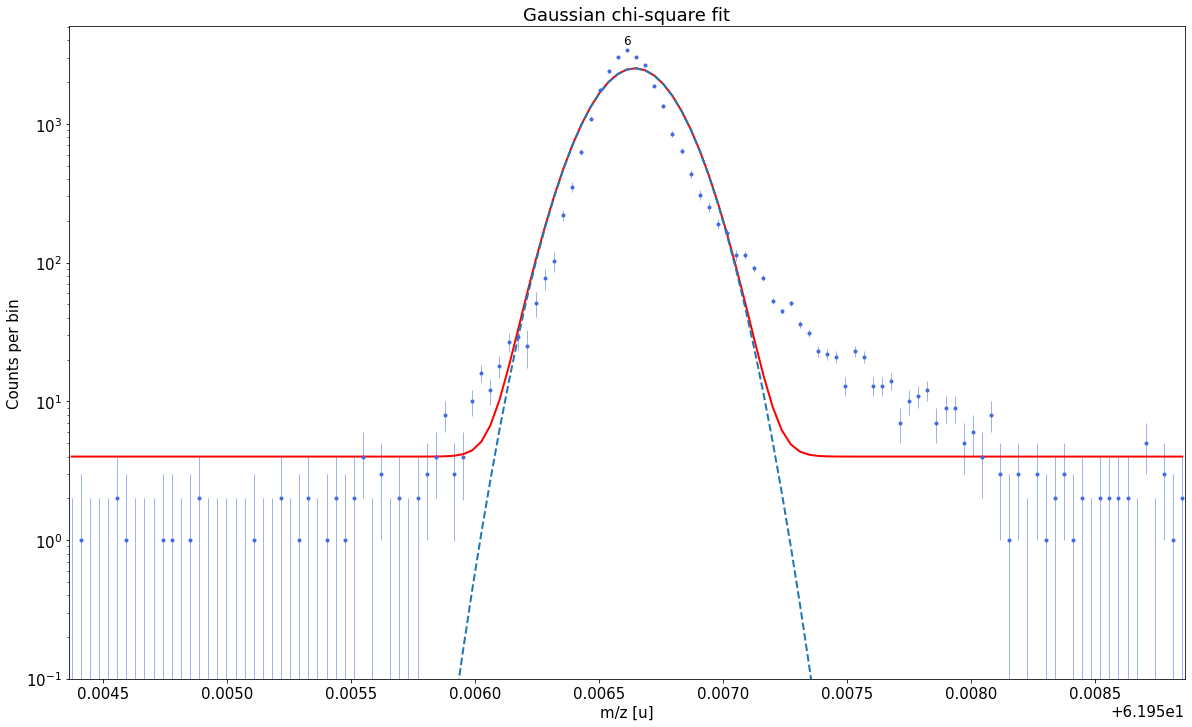

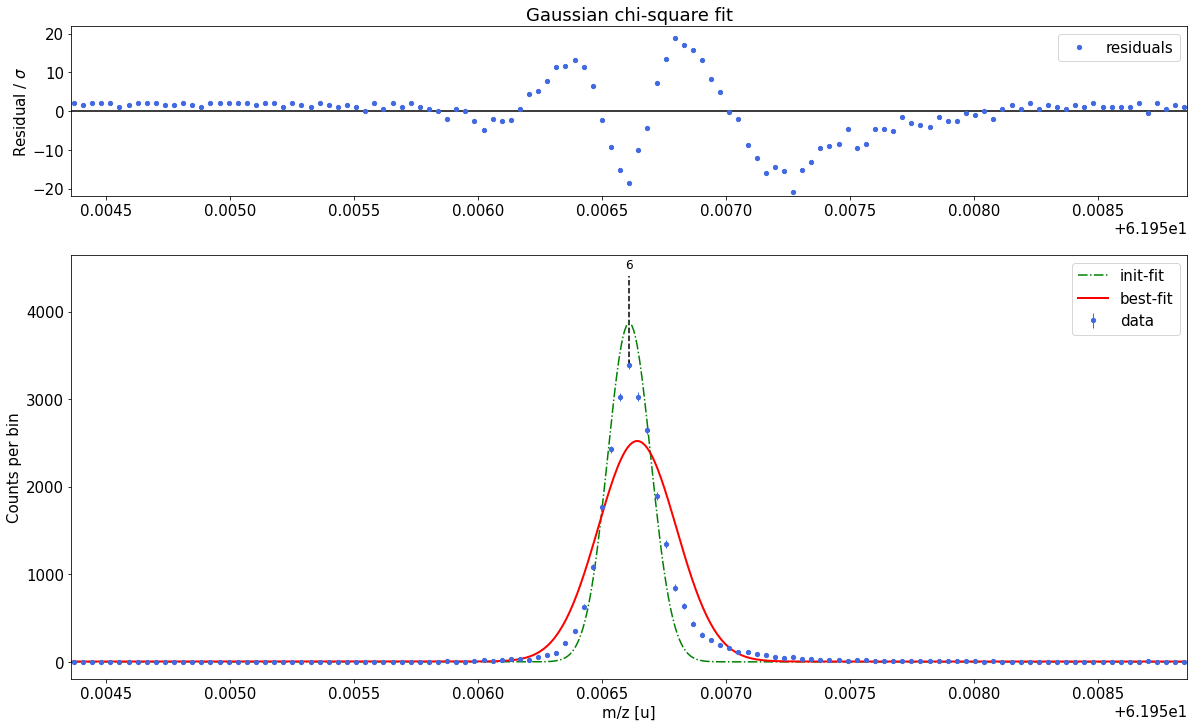


Gaussian-fit yields reduced chi-square of: 45.57 +- 0.13


##### Fitting data with emg01 #####-----------------------------------------------------------------------------------------



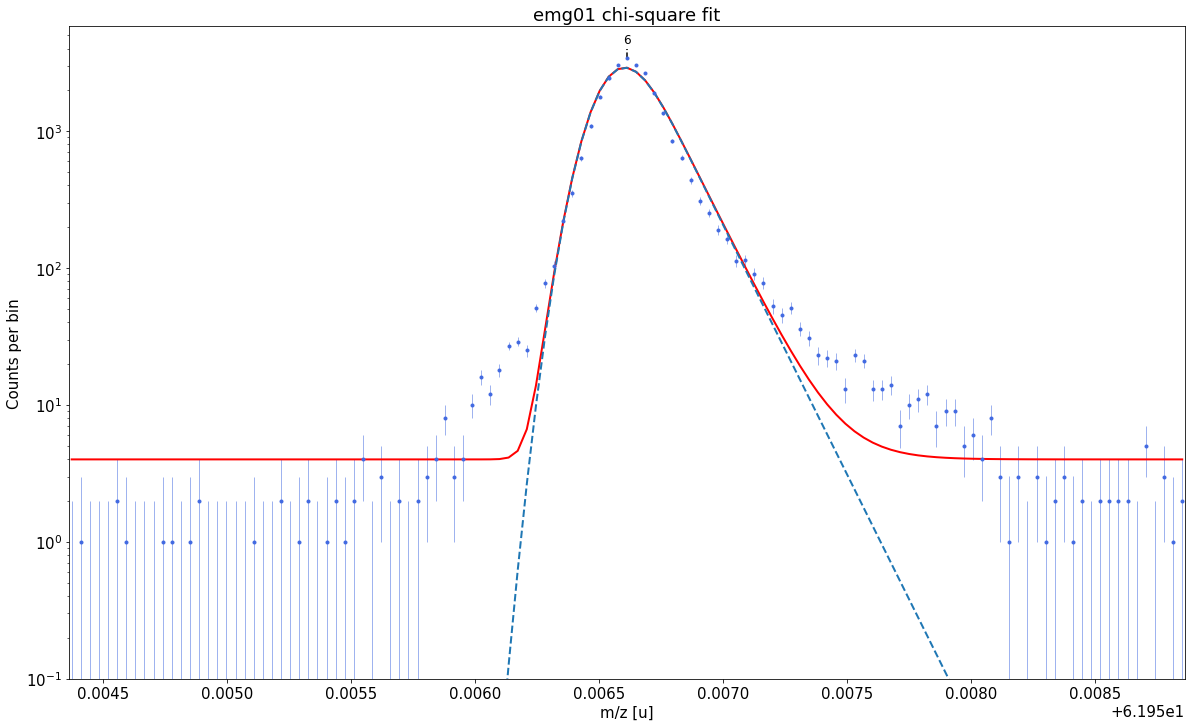

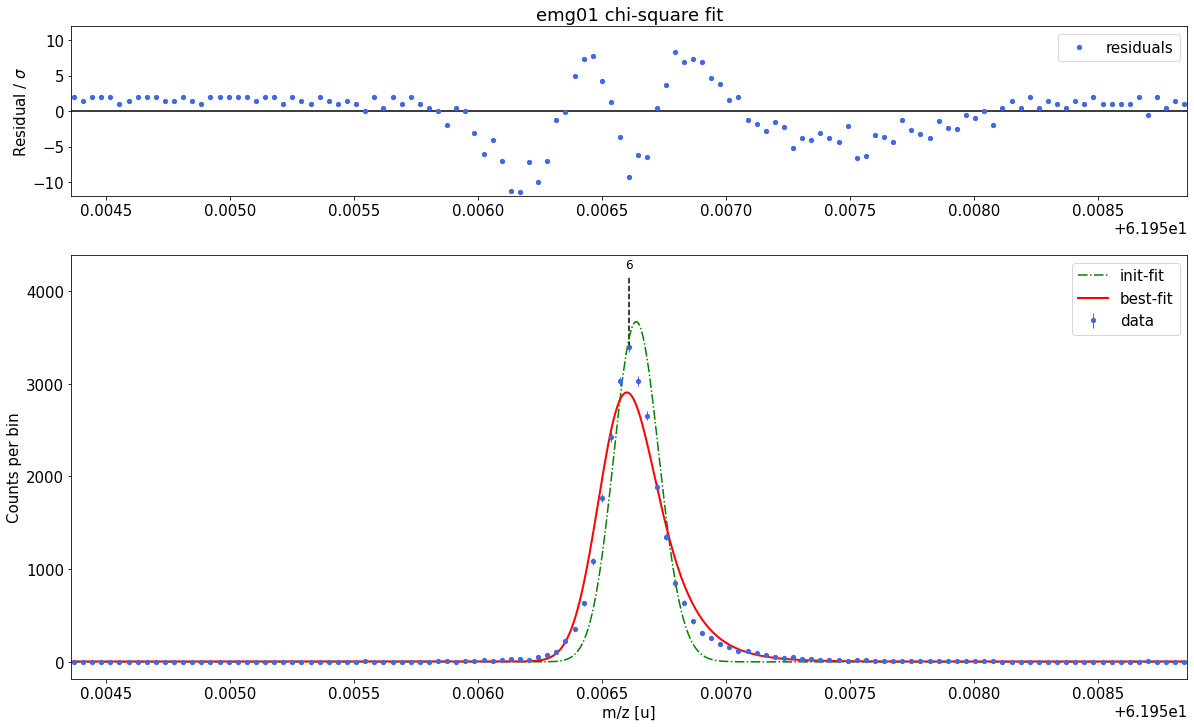


emg01-fit yields reduced chi-square of: 13.79 +- 0.13


##### Fitting data with emg10 #####-----------------------------------------------------------------------------------------



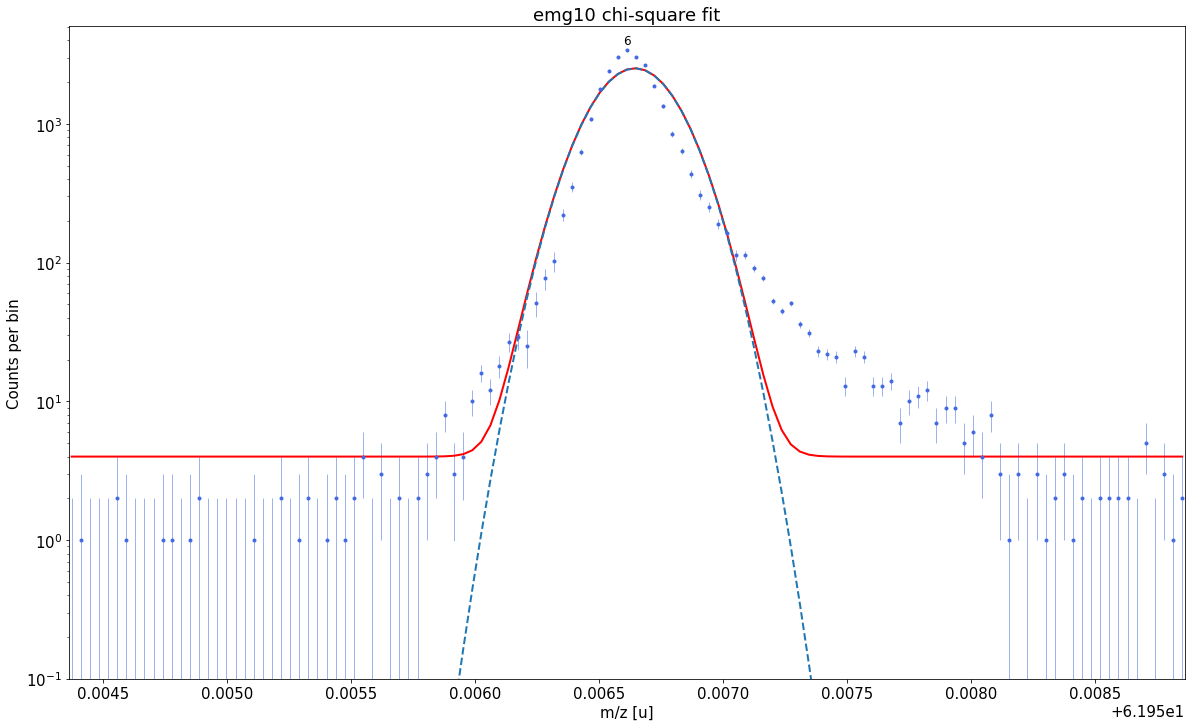

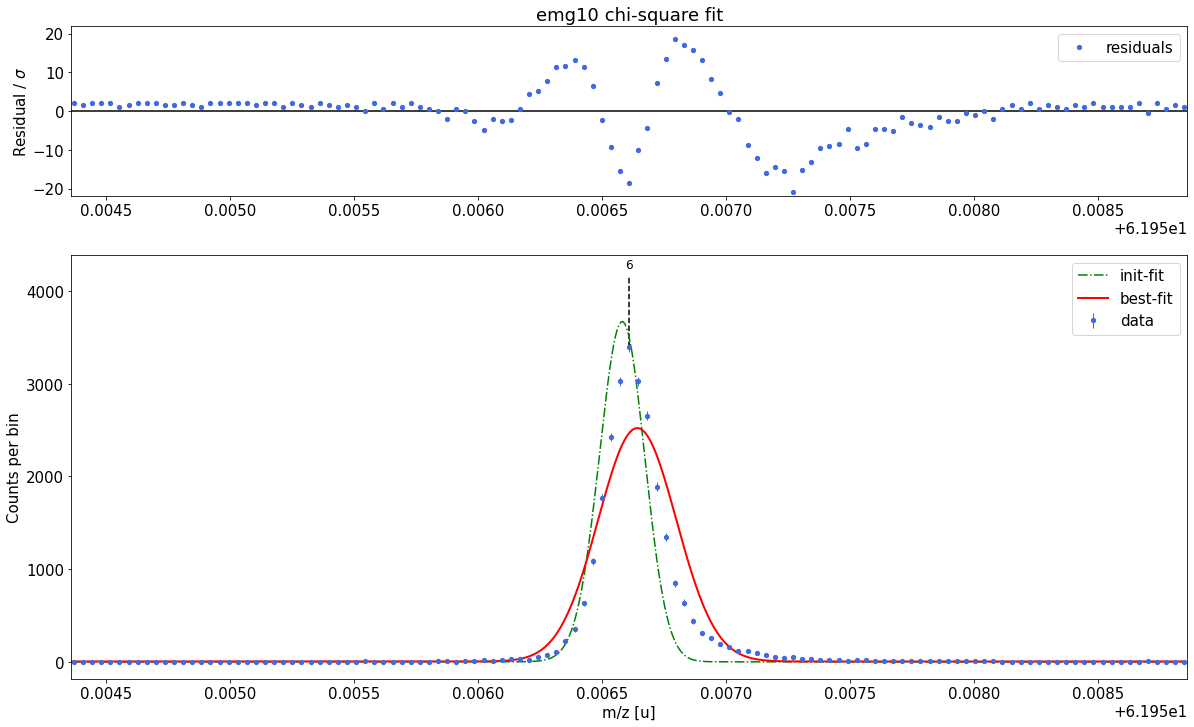


emg10-fit yields reduced chi-square of: 45.96 +- 0.13


##### Fitting data with emg11 #####-----------------------------------------------------------------------------------------



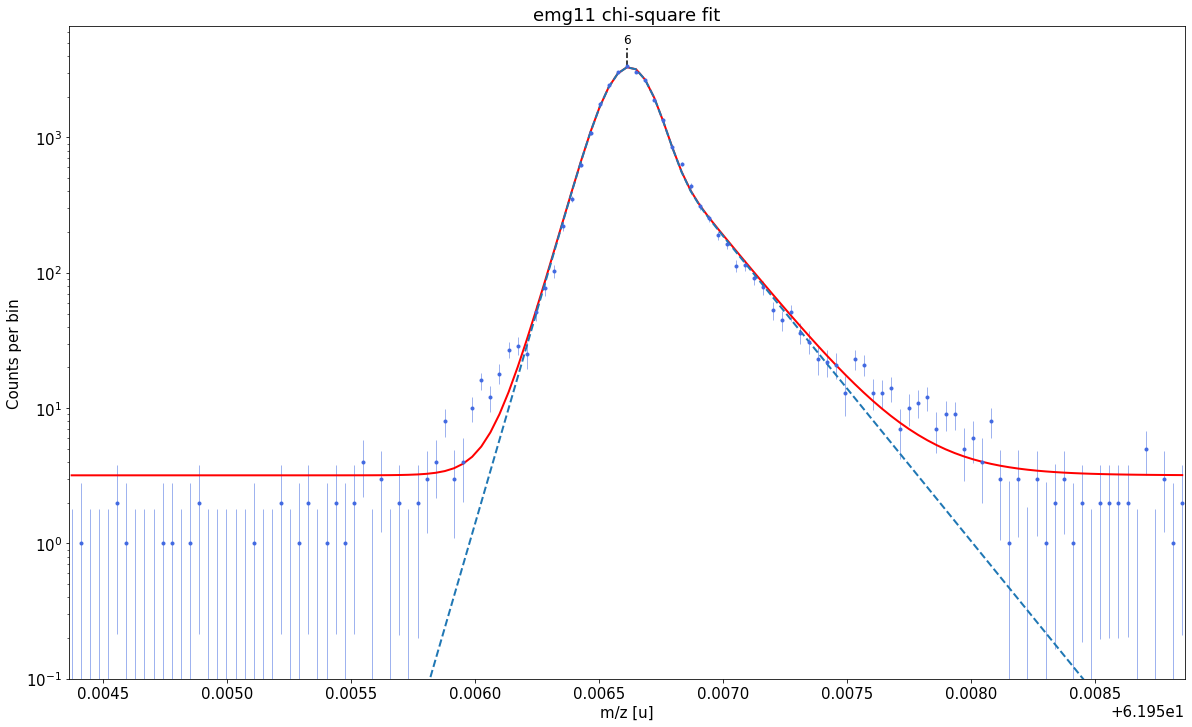

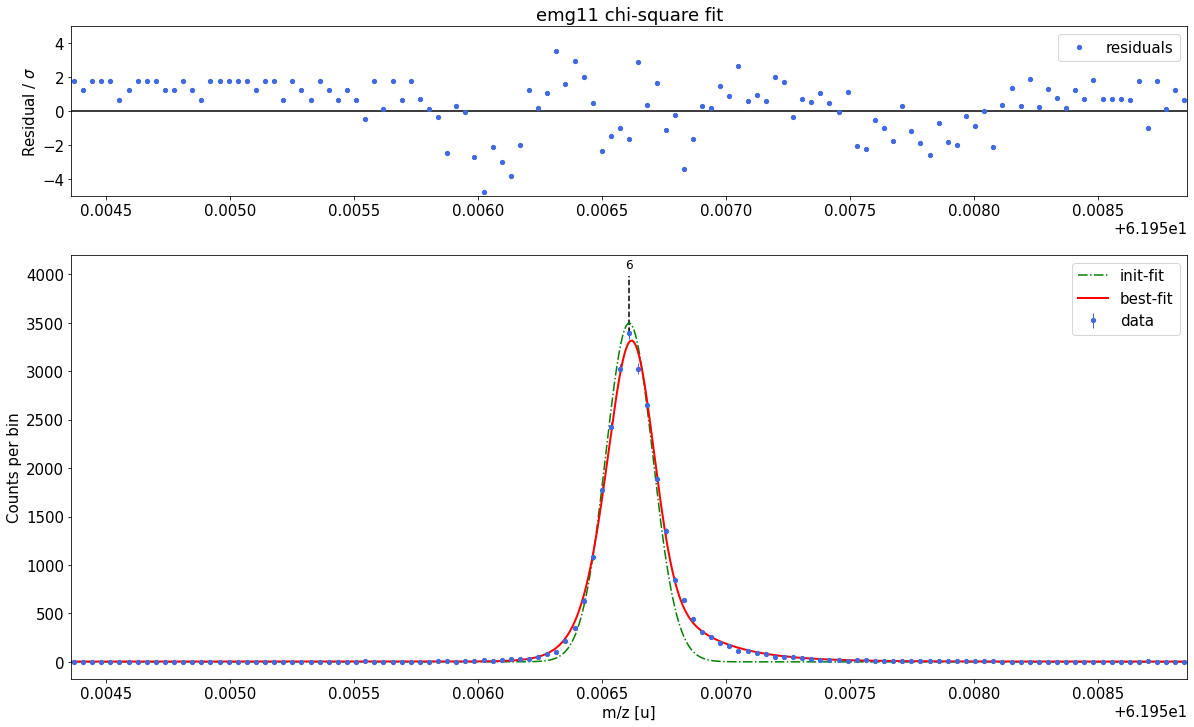


emg11-fit yields reduced chi-square of: 2.6 +- 0.13


##### Fitting data with emg12 #####-----------------------------------------------------------------------------------------



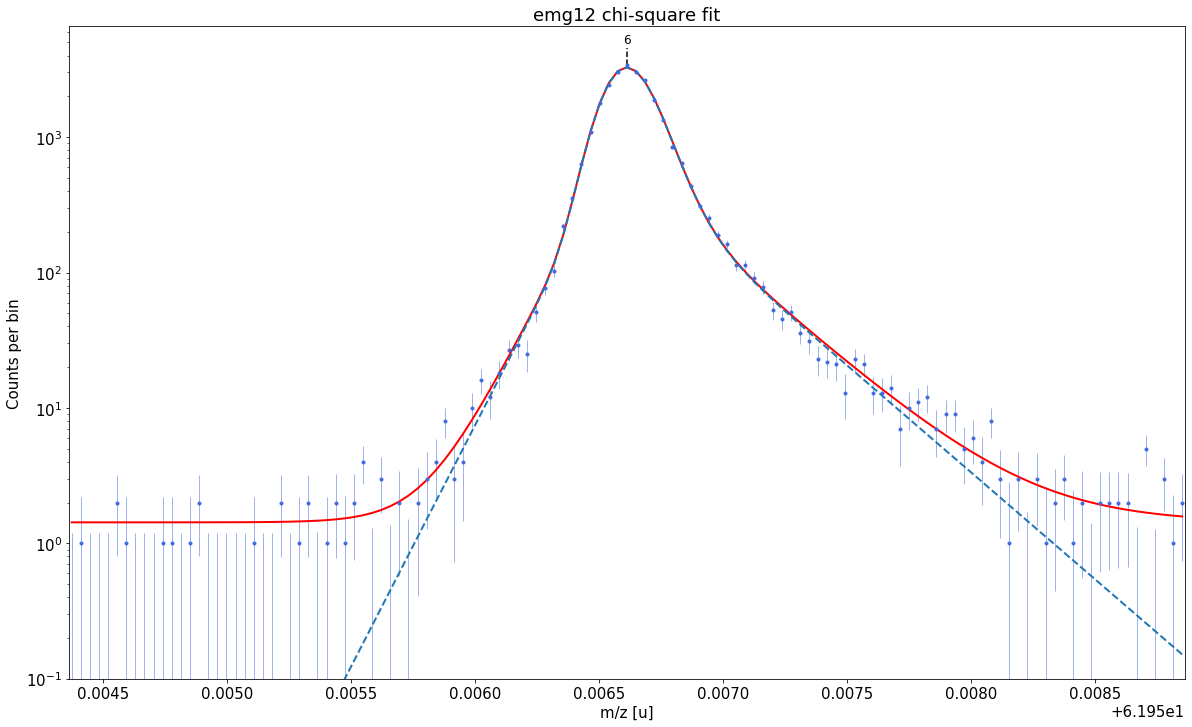

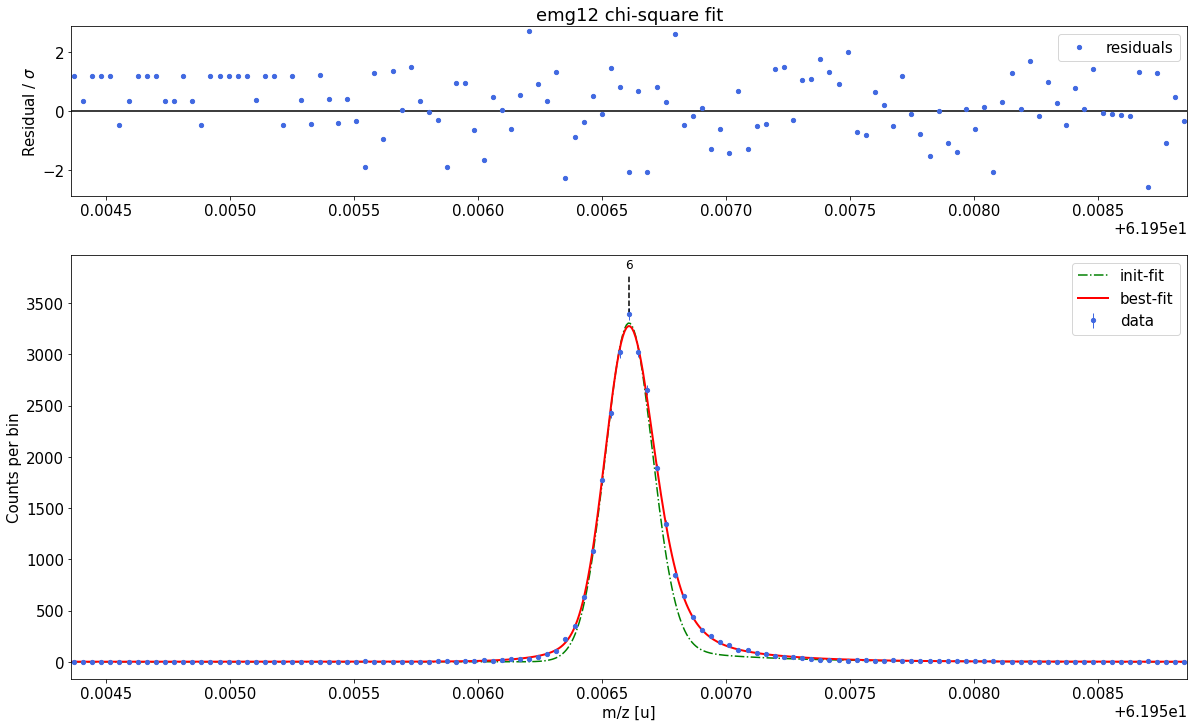


emg12-fit yields reduced chi-square of: 1.22 +- 0.13


##### Fitting data with emg21 #####-----------------------------------------------------------------------------------------



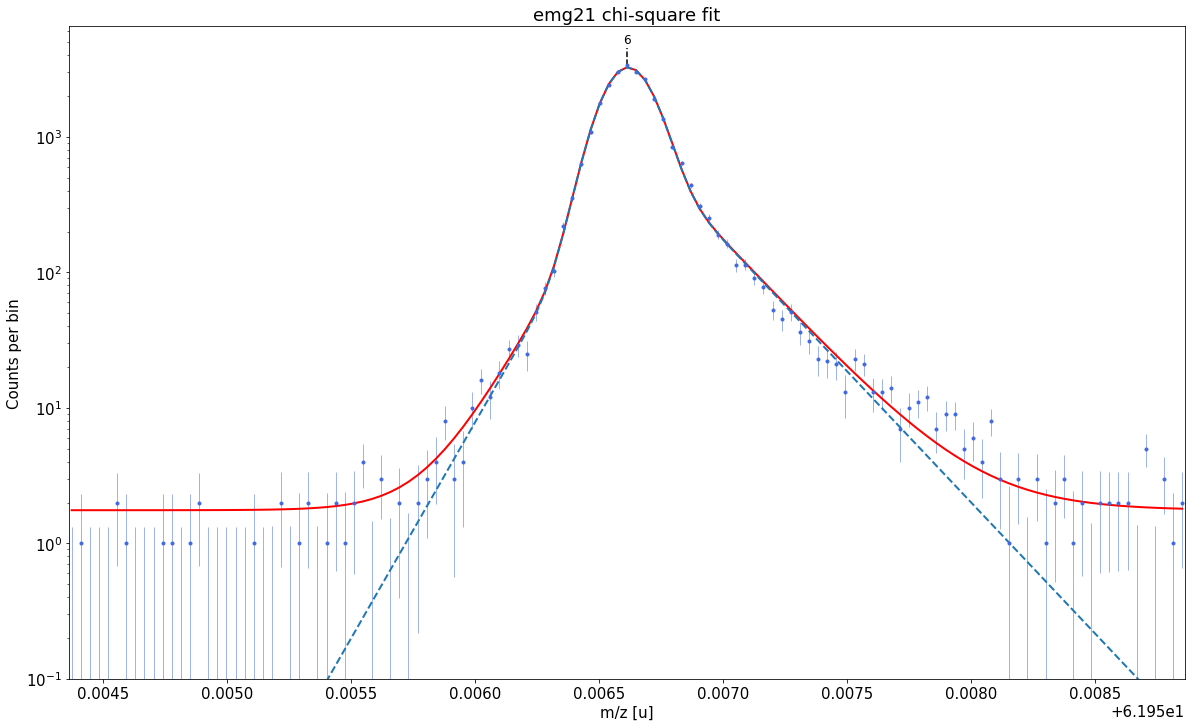

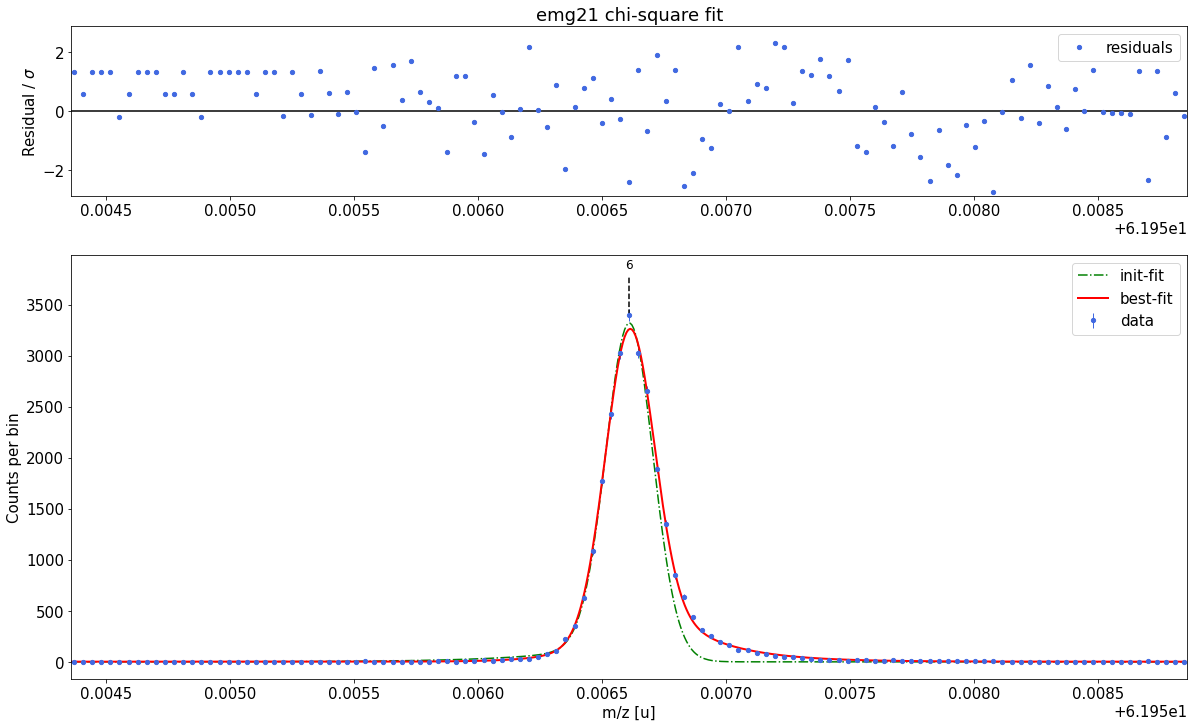


emg21-fit yields reduced chi-square of: 1.47 +- 0.13


##### Fitting data with emg22 #####-----------------------------------------------------------------------------------------



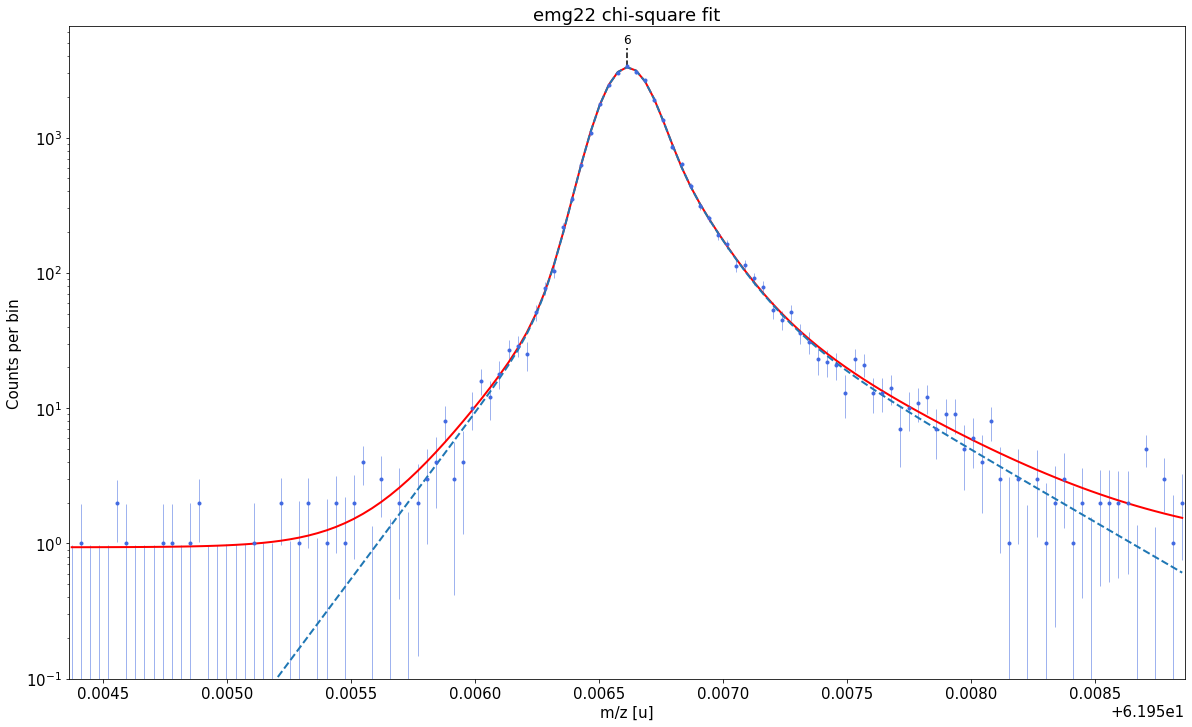

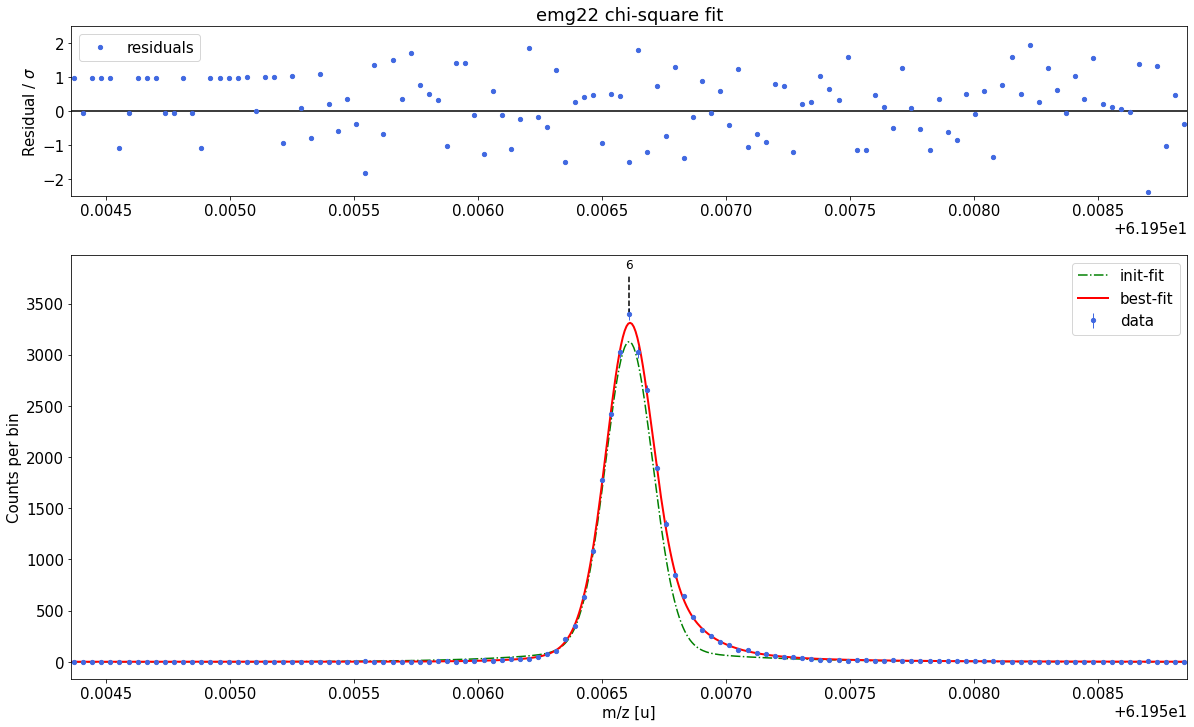


emg22-fit yields reduced chi-square of: 0.96 +- 0.13


##### Fitting data with emg23 #####-----------------------------------------------------------------------------------------



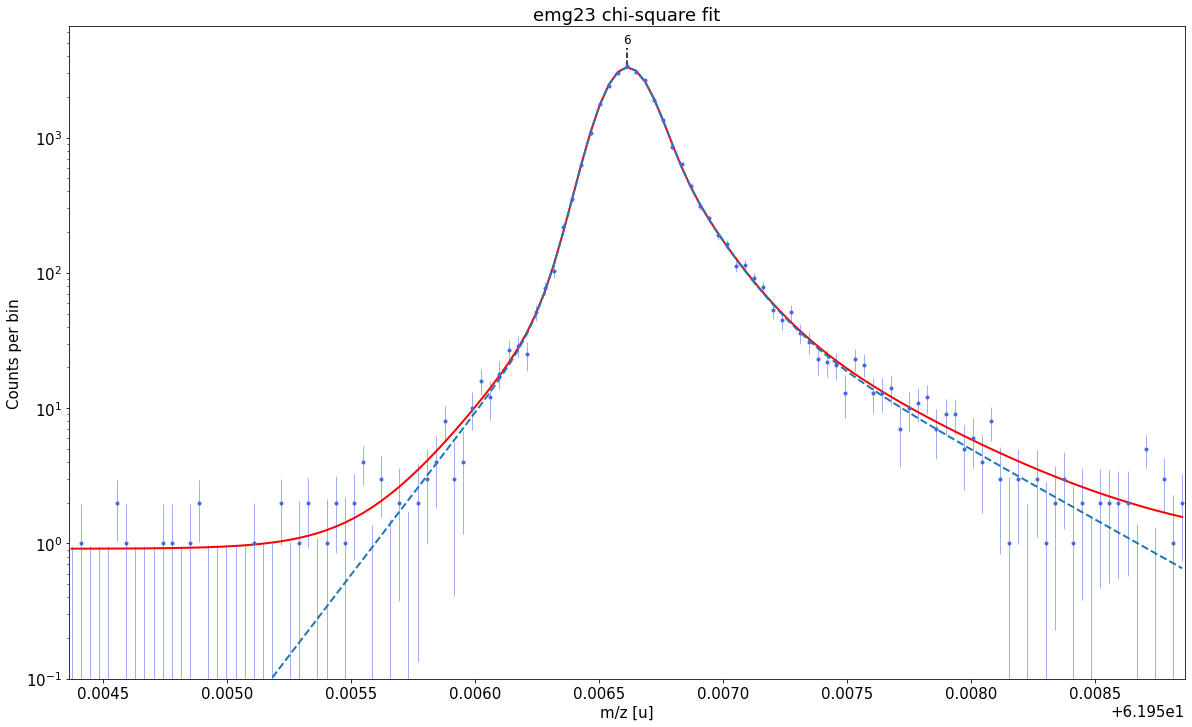

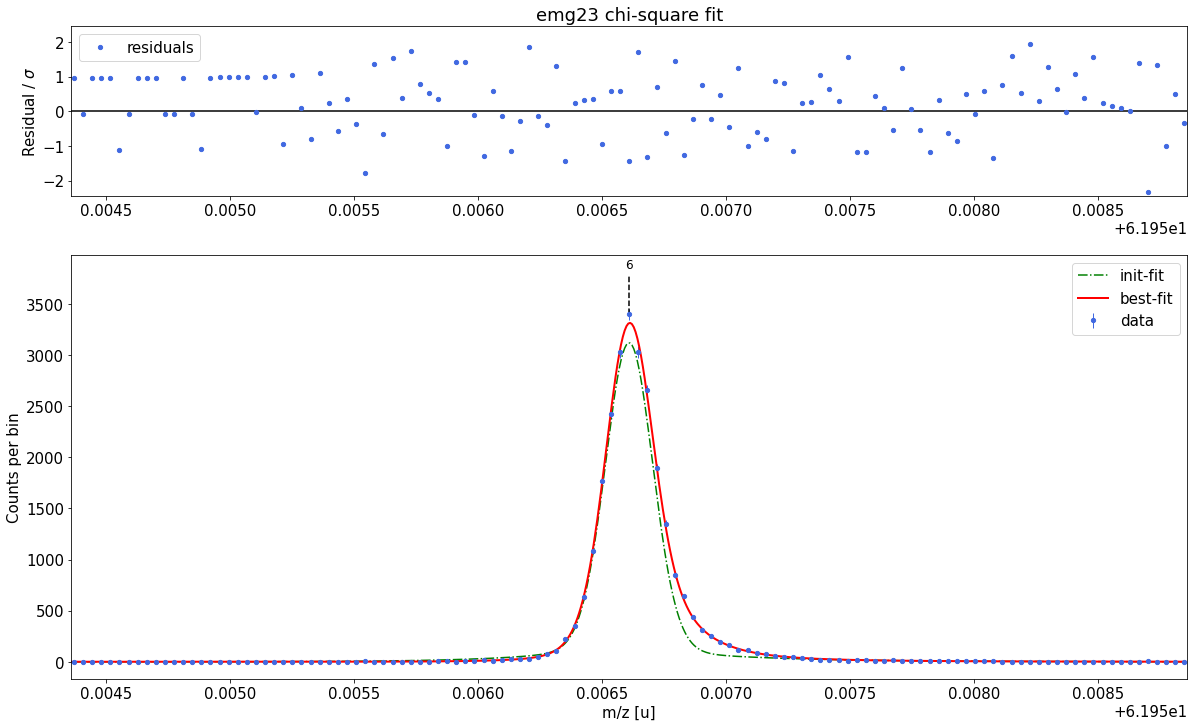

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg23-fit yields reduced chi-square of: 0.98 +- 0.13


##### Fitting data with emg32 #####-----------------------------------------------------------------------------------------



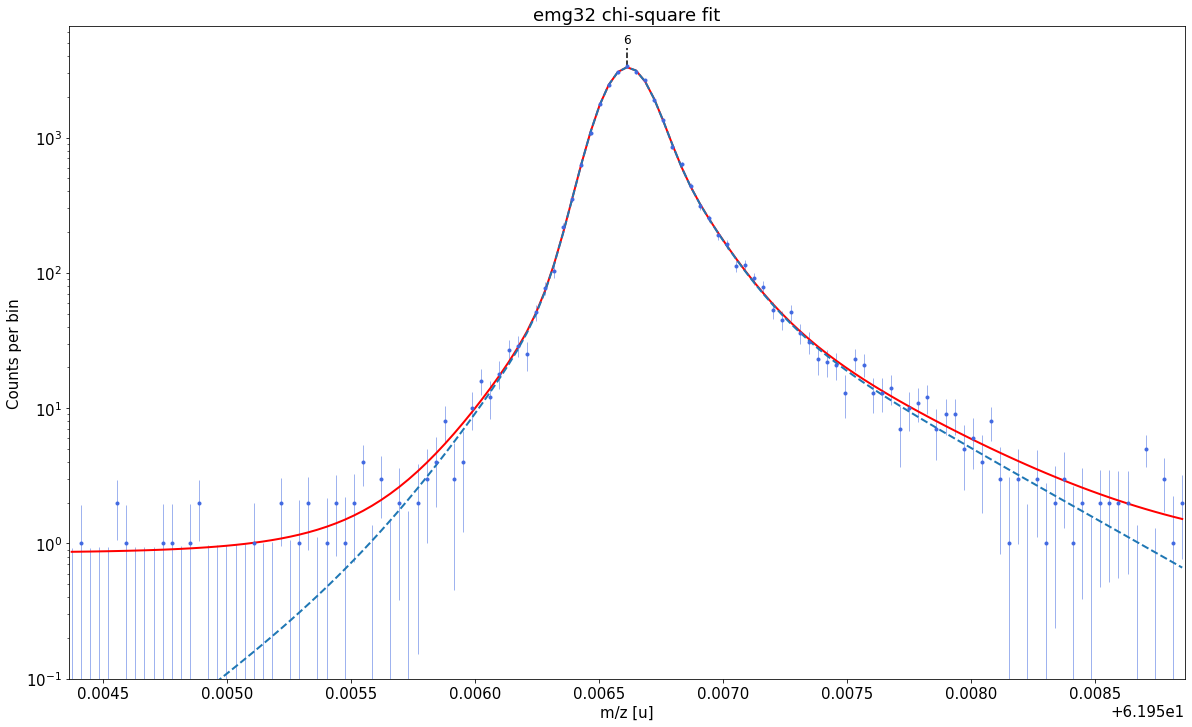

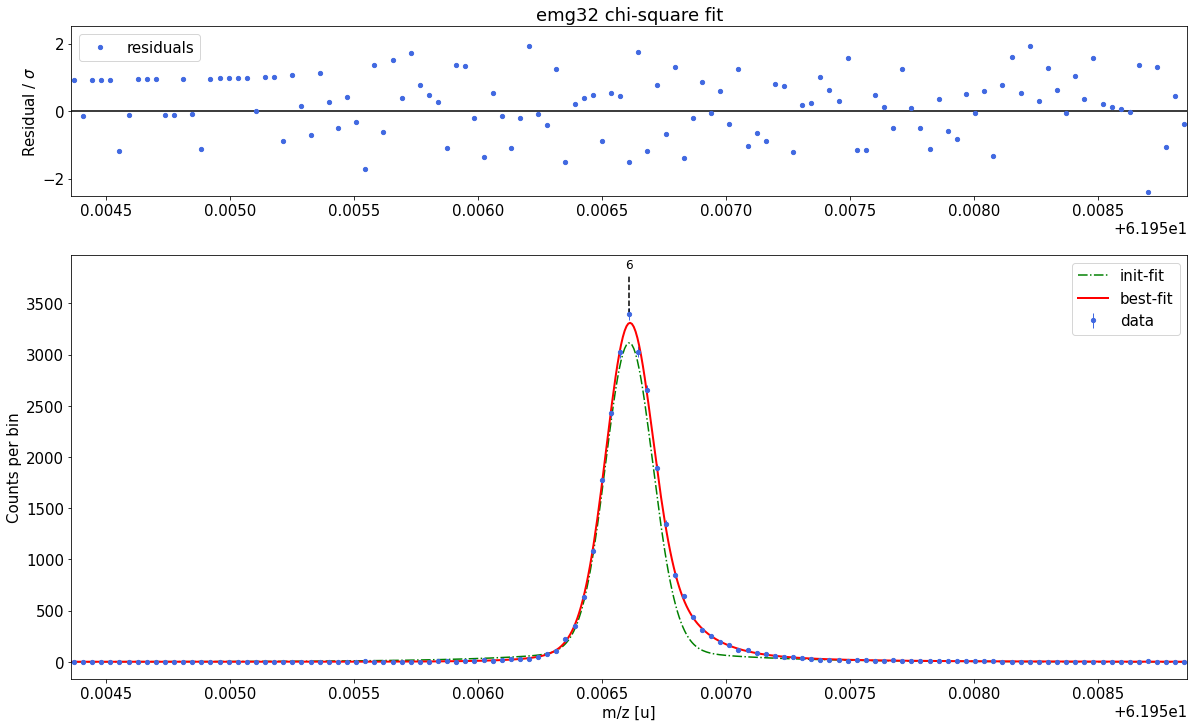

             This tail order is likely overfitting the data and will be excluded from selection.

emg32-fit yields reduced chi-square of: 0.98 +- 0.13


##### Fitting data with emg33 #####-----------------------------------------------------------------------------------------



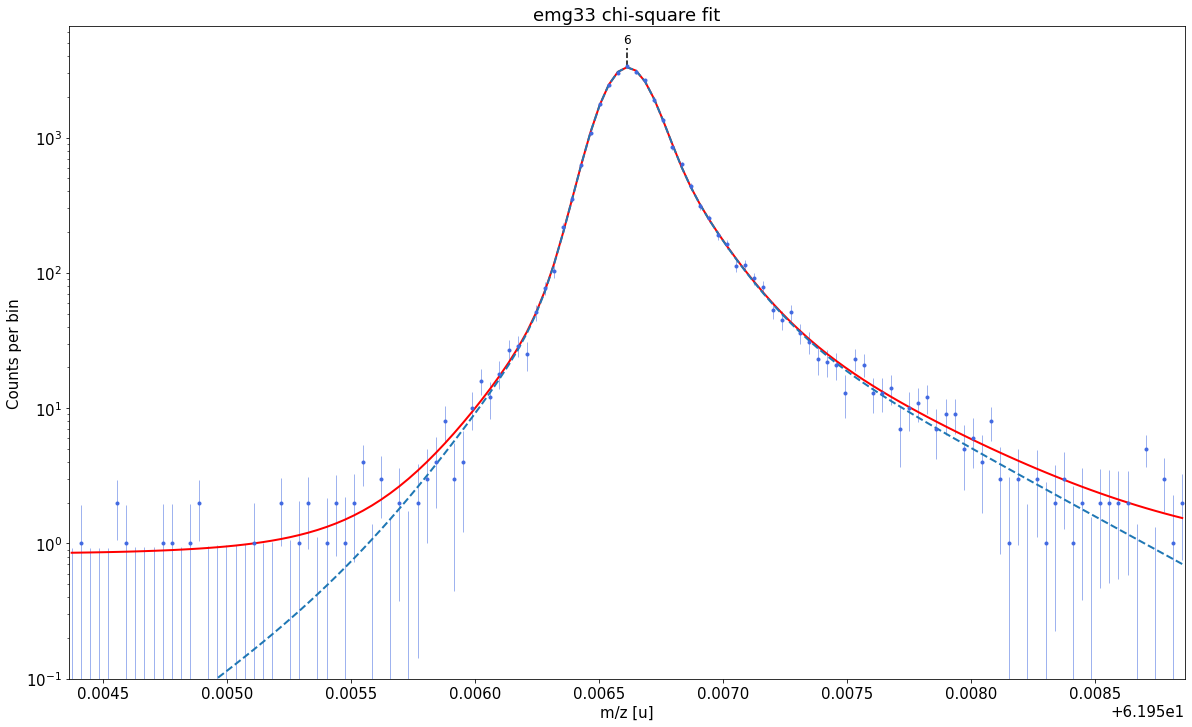

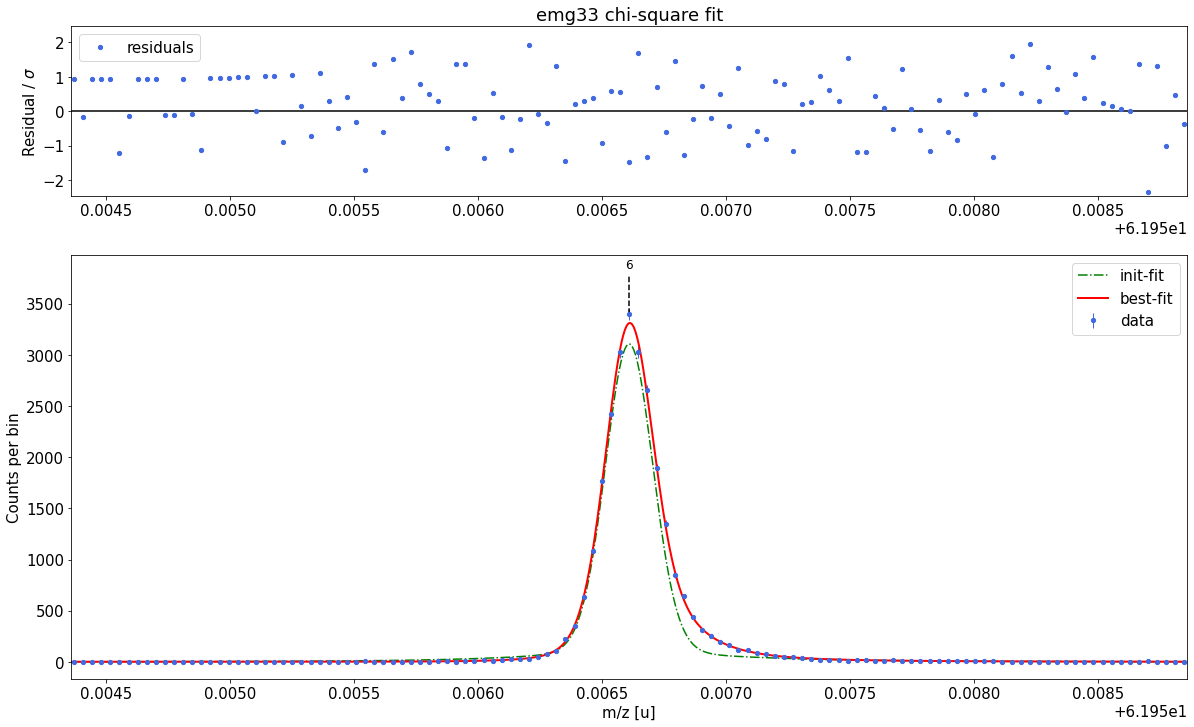

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg33-fit yields reduced chi-square of: 0.99 +- 0.14


##### RESULT OF AUTOMATIC MODEL SELECTION: #####

    Best fit model determined to be: emg22
    Corresponding chi²-reduced: 0.96 


##### Peak-shape determination #####-------------------------------------------------------------------------------------------


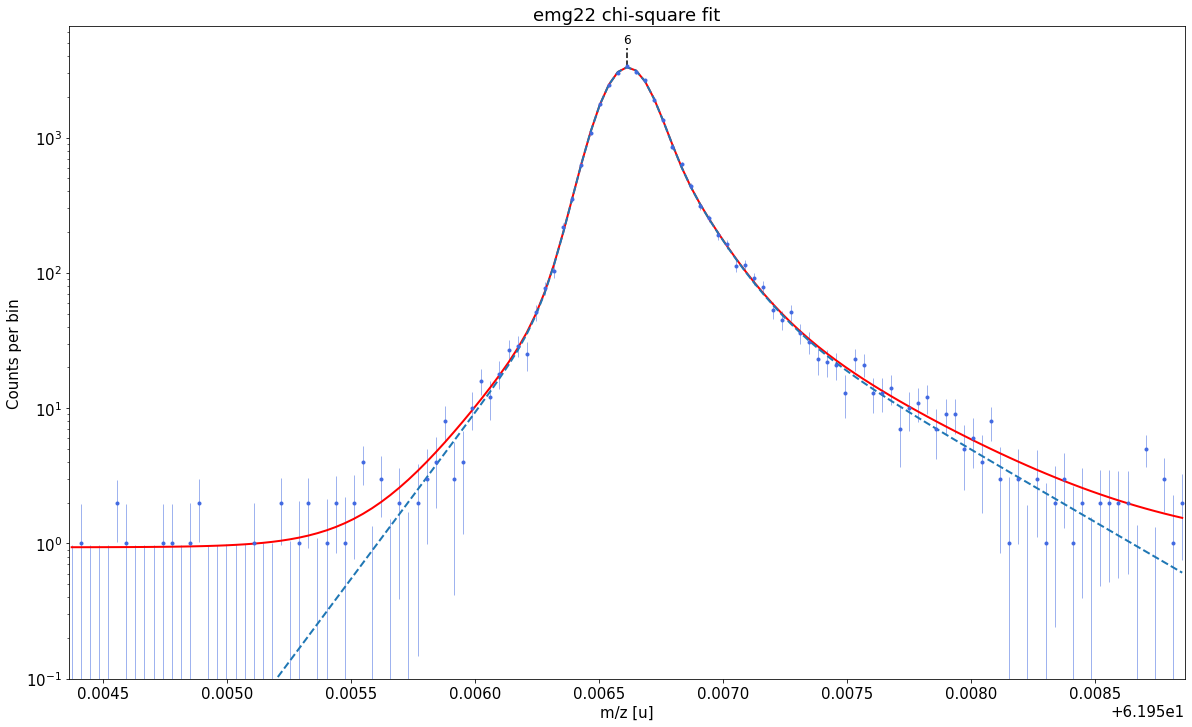

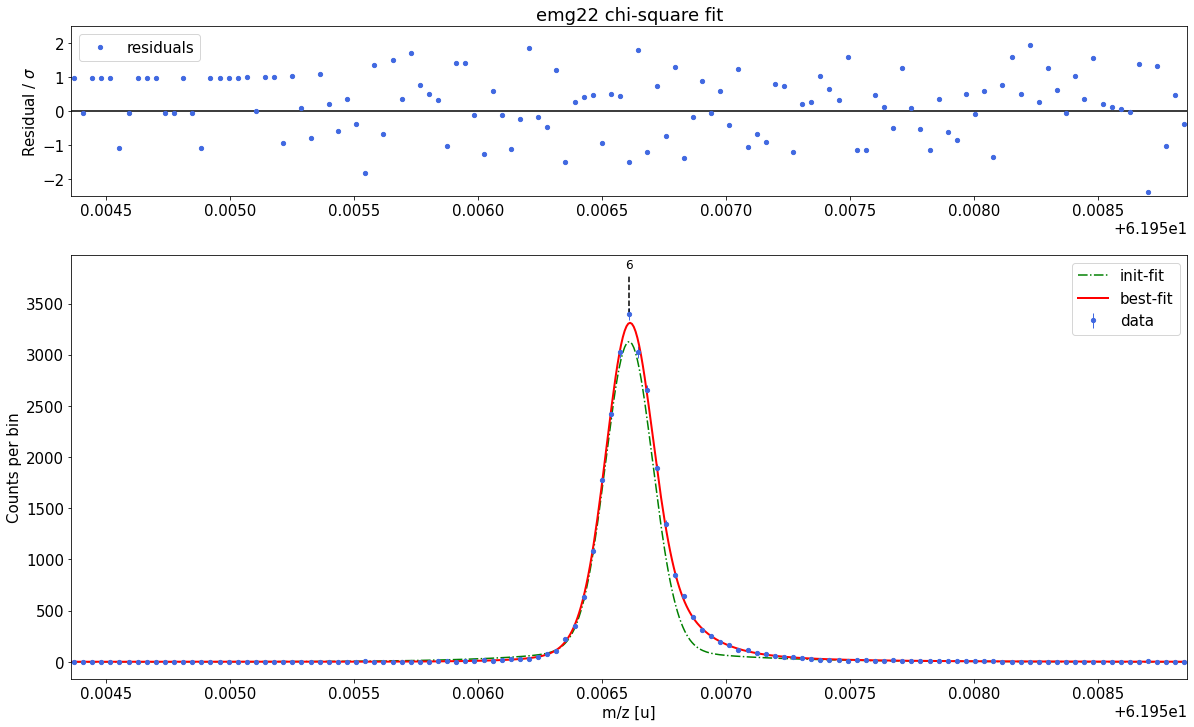

In [30]:
## Peak-shape calibration with default settings, including automatic model selection:
#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e') 

## Peak-shape calibration with user-defined fit range 
spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',x_fit_range=0.0045) 

## Peak-shape calibration with user-defined fit model
#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',fit_model='emg12',vary_tail_order=False)

## Determine A_stat_emg for subsequent stat. error estimations (optional)

The statistical uncertainties of Hyper-EMG fits are estimated using the equation:

$\sigma_{stat} = A_{stat,emg} \cdot \frac{\mathrm{FWHM}}{\sqrt{N_{counts}}}$

where $\mathrm{FWHM}$ and $N_{counts}$ refer to the full width at half maximum and the number of counts in the respective peak.

By default a of value $A_{stat,emg} = 0.52$ will be used for Hyper-EMG models (for Gaussians $A_{stat,G}=0.425$).

However, $A_{stat,emg}$ depends on the peak-shape and can deviate from the default value. Therefore, the `determine_A_stat_emg` method can be used to estimate $A_{stat,emg}$ by fitting many simulated spectra created via bootstrap re-sampling from a reference peak in the spectrum. The reference peak should be well-separated and have decent statistics (e.g. the peak-shape calibrant). For details on how $A_{stat,emg}$ is estimated see the docs of `determine_A_stat_emg`.

This method will typically run for ~10 minutes if `N_spectra=1000` (default) is used. Since this is only for demonstration purposes the number of bootstrapped spectra generated for each data point (`N_spectra` argument) was reduced to 10 to get a quicker run time. This is also the reason for the large scatter of the data points below. 

In practice it is convenient to skip this method for the first processing of the spectrum since this will only affect the statistical uncertainties but no other fit properties. Once reasonable fits have been achieved for all peaks of interest in the cells below, the exact uncertainties can be obtained by returning to this cell to execute `determine_A_stat_emg` with a decent value for `N_spectra`  and then re-runnning the cells below (then with the update value for `A_stat_emg`). The latter is conveniently done by using the `Run All Below` option in the `Cell` panel of the Jupyter Notebook.

Creating synthetic spectra via bootstrap re-sampling and fitting them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.

Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 1.5599e-08
    reduced chi-square = 2.2284e-09
    Akaike info crit   = -158.444191
    Bayesian info crit = -158.364750
[[Variables]]
    amplitude:  1.5233e-04 +/- 1.6364e-05 (10.74%) (init = 1)
    exponent:  -0.5 (fixed)


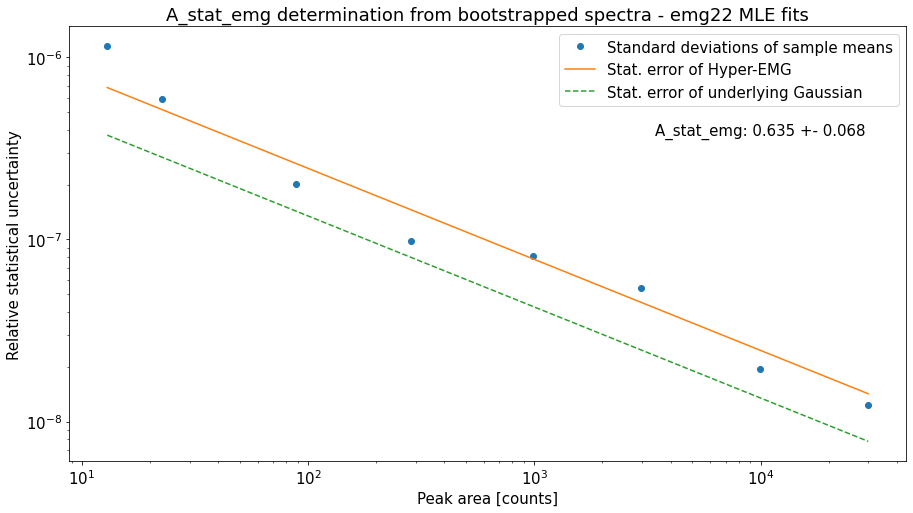

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.635 +- 0.068


In [19]:
# Determine A_stat_emg and save the resulting plot 
spec.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,plot_filename='outputs/'+filename+'MLE',N_spectra=10) 

## Fit all peaks, perform mass re-calibration & obtain final mass values
The following code fits all peaks in the spectrum, performs the mass (re-)calibration, determines the peak-shape uncertainties and updates the peak properties list with the results including the final mass values and their uncertainties. 

The simultaneous mass recalibration is optional and only invoked when the `species_mass_calib` (or the `index_mass_calib`) argument are specified. If this feature is not used, the `fit_peaks` method requires a pre-existing mass calibration (see Alternative 1 section below). In contrast to `determine_peak_shape`, by default the `fit_peaks` method performs a binned maximum likelihood fit ('MLE'). For chi-square fitting with `fit_peaks`, see Alternative 2 section below. Fits with `fit_peaks` can be restricted to a user-defined mass range (see the commented-out line of code below). 

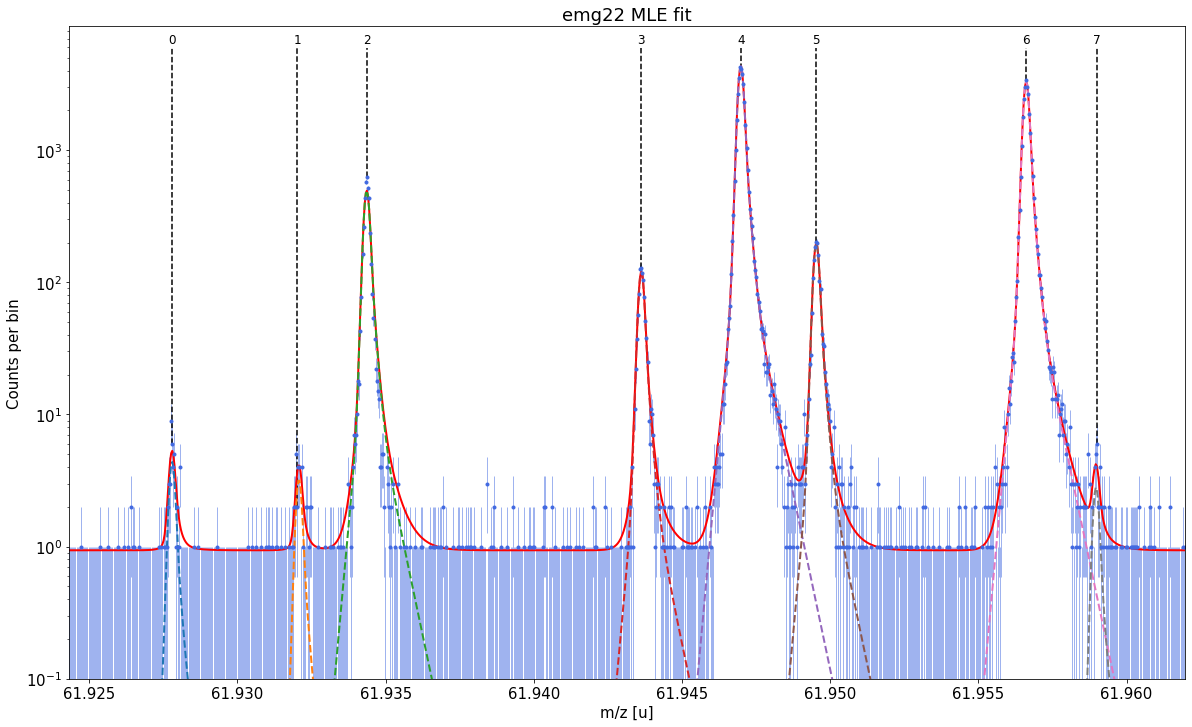

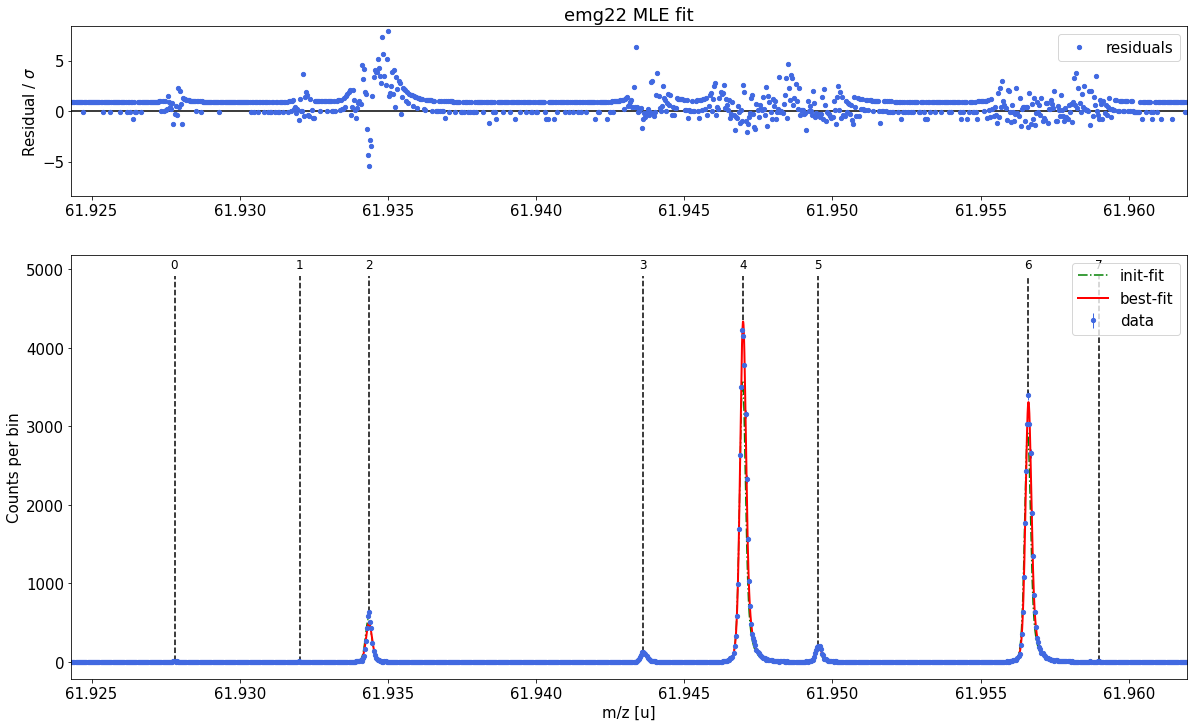


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.3e-08

Recalibration factor:      0.999999711 = 1 -2.89e-07
Relative recalibration error:  1.4e-08 


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.497351 / -0.268 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 1.419093 / -0.367 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.124142 / 0.337 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by 0.009671 / 0.025 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.013996 / 0.002 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.011674 / -0.

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,0.57,34.28,5.57,61.927803,4.201252e-07,1.364463e-08,3.363408e-08,4.216902e-07,62.0,-66740.226,24.325358,6.103
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,MLE,0.57,25.16,5.57,61.932083,4.903586e-07,1.364463e-08,3.896354e-08,4.920934e-07,NaN,NaN,28.388556,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,0.57,3879.62,47.60,61.934370,3.948739e-08,1.364463e-08,1.705503e-08,4.512542e-08,NaN,NaN,2.603353,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,0.57,939.07,23.68,61.943636,8.024891e-08,1.364463e-08,1.113415e-08,8.215858e-08,62.0,-51992.089,4.740561,-5.177
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,0.57,33951.28,140.21,61.946993,1.334555e-08,1.364463e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,0.57,1542.61,30.25,61.949540,6.260639e-08,1.364463e-08,1.106218e-08,6.502390e-08,62.0,-46492.523,3.752245,5.702
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,0.57,25913.21,121.87,61.956622,1.527343e-08,1.364463e-08,2.667518e-09,2.065355e-08,62.0,-39895.648,1.191962,0.623
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,0.57,22.08,5.39,61.958978,5.232160e-07,1.364463e-08,1.512689e-07,5.448150e-07,NaN,NaN,31.443685,NaN


In [20]:
# Maximum likelihood fit of all peaks in the spectrum
spec.fit_peaks(species_mass_calib='Ti46:O16:-1e') 

# Maximum likelihood fit of peaks in a user-defined mass range
#spec.fit_peaks(species_mass_calib='Ti46:O16:-1e',x_fit_cen=61.9455,x_fit_range=0.01)

## Plot the fit curve zoomed to a region of interest (optional)
For more detailed inspection of the fit, a zoom to peaks or regions of interest can be shown with the `plot_fit_zoom` method.  

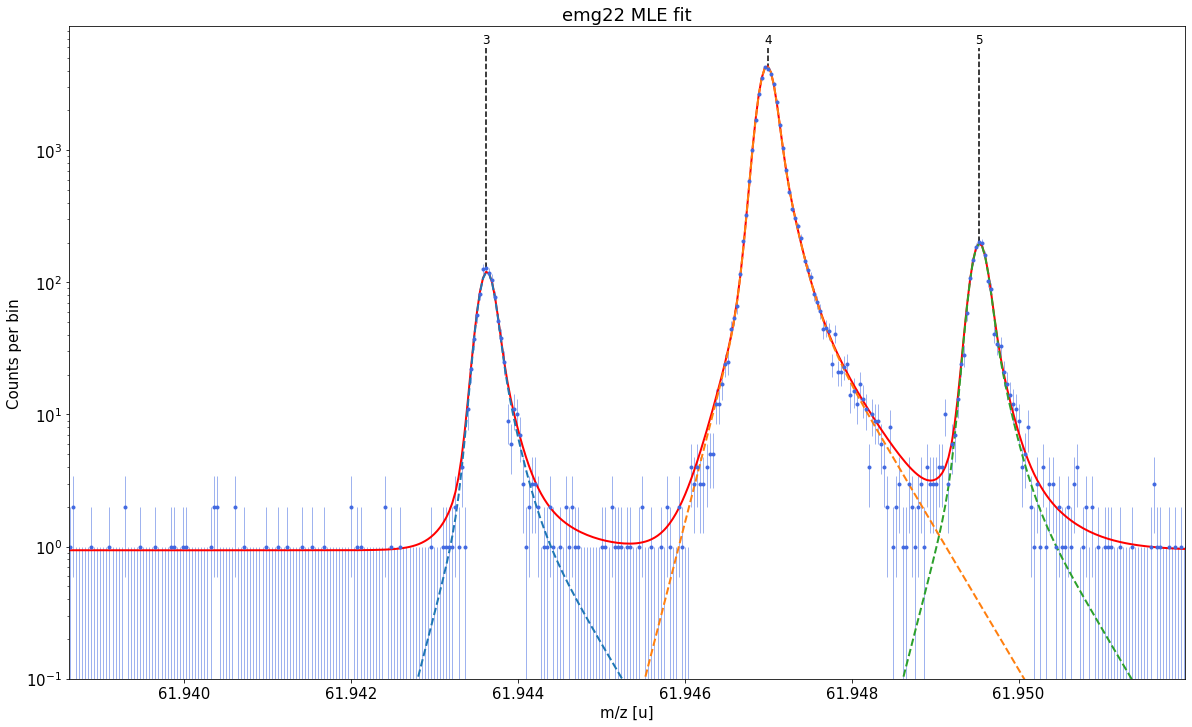

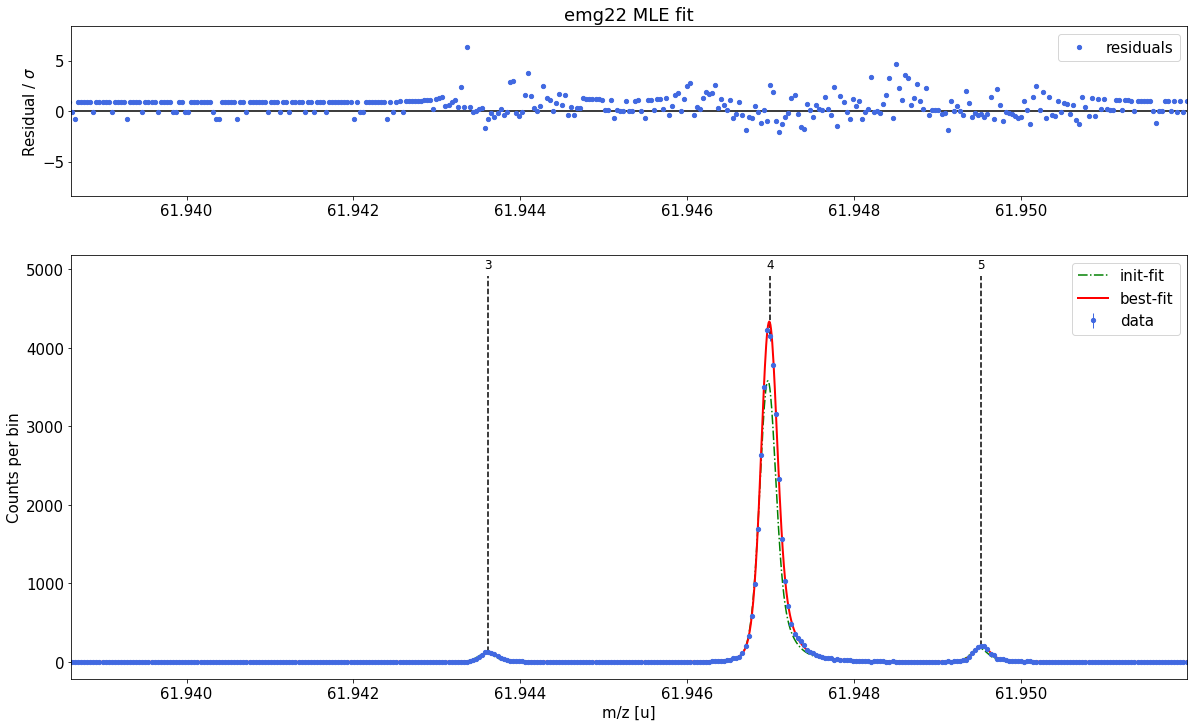

In [21]:
spec.plot_fit_zoom(peak_indeces=[3,4]) # zoom to region around peaks 3 and 4 

## Export fit results
Once all peaks have been fitted. The results can be exported to an XLSX Excel file and a separate file with the peak_shape calibration parameters. The XLSX file contains three sheets: 
1. General properties the spectrum object, e.g. input filename, used version of emgfit and all relevant dependencies, ...   
2. The peak properties table and linear and logarithmic plots of the full spectrum fit.
3. The peak centroid shifts relative to the mass calibrant obtained in the peak-shape uncertainty evaluation. 

In [22]:
spec.save_results('outputs/'+filename+' fitting MLE')

ERROR: File outputs/2019-09-13_004-_006 SUMMED High stats 62Ga fitting MLE.xlsx already exists. No files saved! Choose a different filename or delete the original file and re-try.


**That's it! In principle we're be done with the fitting at this point.**  Next we would probably take a look at the output file and proceed with some post-processing in Excel (e.g. combining mass values from different spectra etc.). 

However, since emgfit gives the user a large amount of freedom, there's are a number of things that could have been done differently depending on your preferences. So here is some possible...  





## Alternative procedures:

The above steps represent a full spectrum analysis. However, emgfit gives the user the freedom to take many different routes in processing the spectrum. Some of the possible alternatives are presented in the following: 

### Alternative 1: Performing the mass recalibration separately before the ion-of-interest fits
All steps up to the final peak fit are identical. For breviety here we simply create an exact clone of the above spectrum object:

In [23]:
import copy
spec2 = copy.deepcopy(spec) # create a clone of the spectrum object

#### First obtain the recalibration factor by a fit of the mass calibrant

##### Calibrant fit #####


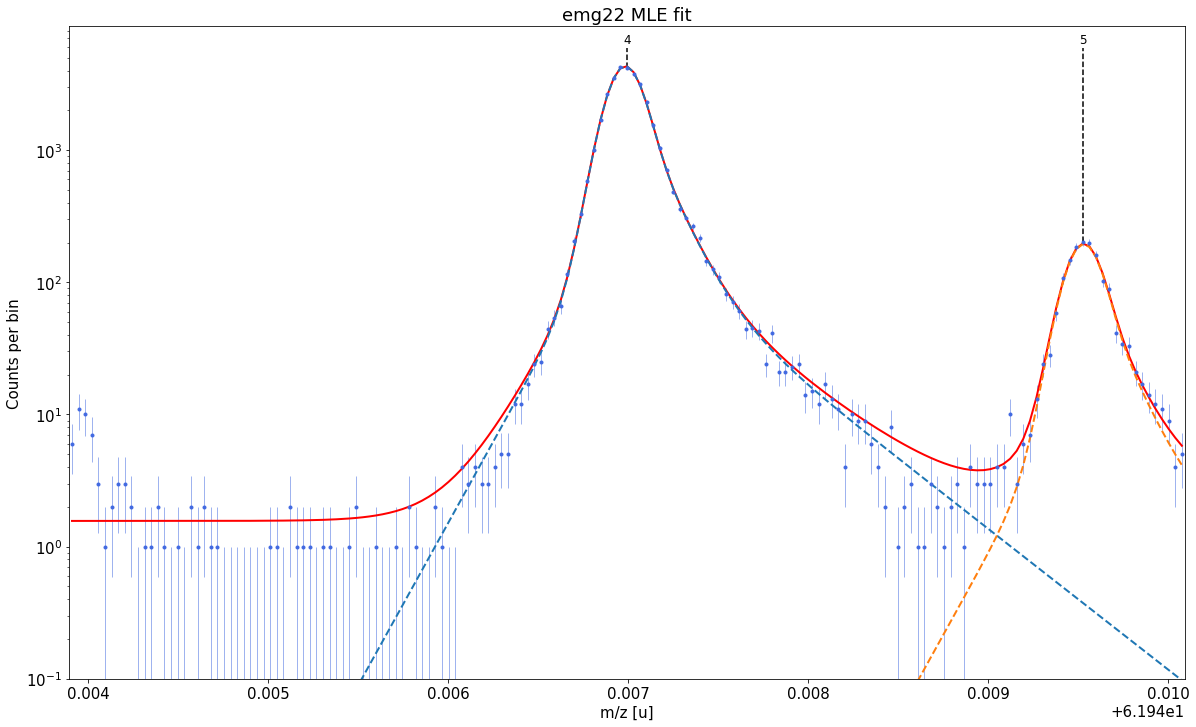

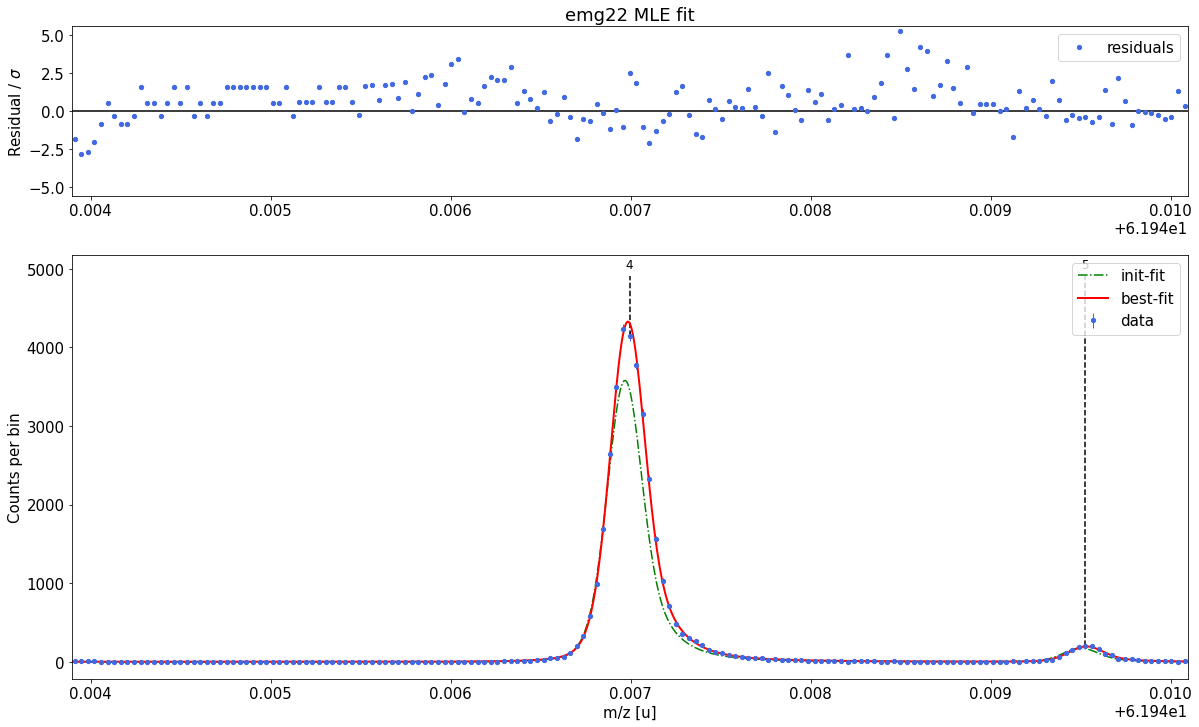


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.3e-08

Recalibration factor:      0.999999711 = 1 -2.89e-07
Relative recalibration error:  1.4e-08 

Determining absolute centroid shifts of mass calibrant.



In [24]:
spec2.fit_calibrant(species_mass_calib='Ti46:O16:-1e')

#### Fit all peaks and use the mass recalibration factor from above to calculate the final mass values

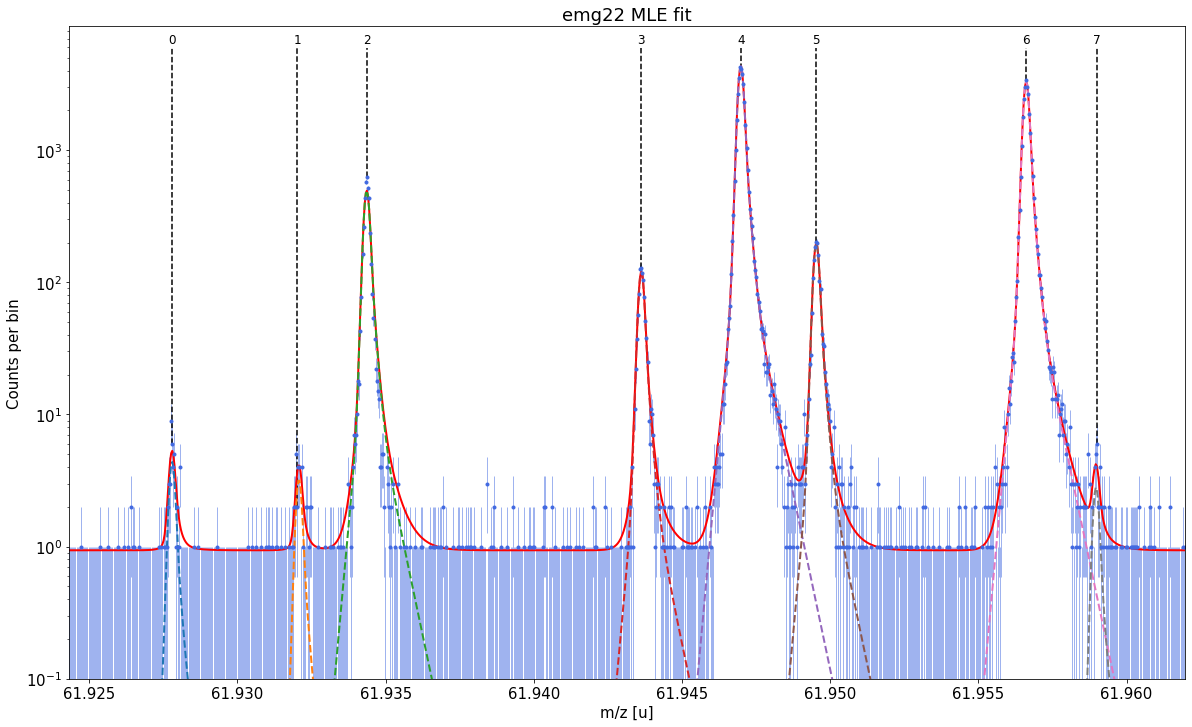

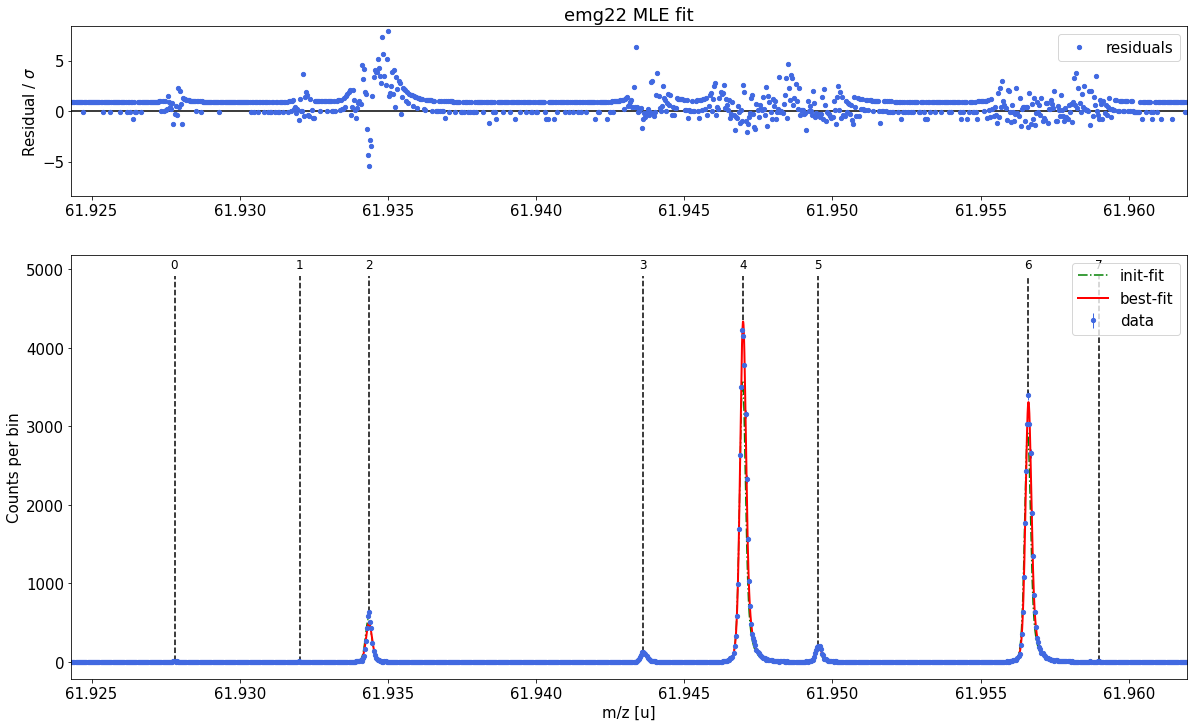


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.497351 / -0.268 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 1.419093 / -0.367 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.124142 / 0.337 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by 0.009671 / 0.025 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.013996 / 0.002 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.011674 / -0.032 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 7 and mass calibrant by -1.469082 / 0.908 μu. 

Re-fitting with  theta  =  0.724714 +/- 0.023491  shifts Δm of peak 0 and mass calibrant by -1.447898 / 1.312 μu. 
Re-

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,0.57,34.28,5.57,61.927803,4.201252e-07,1.365261e-08,3.363408e-08,4.216904e-07,62.0,-66740.241,24.325373,6.088
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,MLE,0.57,25.16,5.57,61.932083,4.903586e-07,1.365261e-08,3.896354e-08,4.920936e-07,NaN,NaN,28.388569,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,0.57,3879.62,47.60,61.934370,3.948739e-08,1.365261e-08,1.705503e-08,4.512784e-08,NaN,NaN,2.603493,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,0.57,939.07,23.68,61.943636,8.024891e-08,1.365261e-08,1.113415e-08,8.215990e-08,62.0,-51992.104,4.740637,-5.192
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,1.30,33909.80,213.09,61.946993,1.335371e-08,1.365261e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,0.57,1542.61,30.25,61.949540,6.260639e-08,1.365261e-08,1.106218e-08,6.502557e-08,62.0,-46492.538,3.752342,5.687
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,0.57,25913.21,121.87,61.956622,1.527343e-08,1.365261e-08,2.667518e-09,2.065882e-08,62.0,-39895.663,1.192267,0.608
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,0.57,22.08,5.39,61.958978,5.232160e-07,1.365261e-08,1.512689e-07,5.448152e-07,NaN,NaN,31.443697,NaN


In [25]:
spec2.fit_peaks()

### Alternative 2: Chi-square instead of MLE fitting 

Creating synthetic spectra via bootstrap re-sampling and fitting them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.

Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 7.5126e-09
    reduced chi-square = 1.0732e-09
    Akaike info crit   = -164.288995
    Bayesian info crit = -164.209554
[[Variables]]
    amplitude:  1.5101e-04 +/- 1.2185e-05 (8.07%) (init = 1)
    exponent:  -0.5 (fixed)


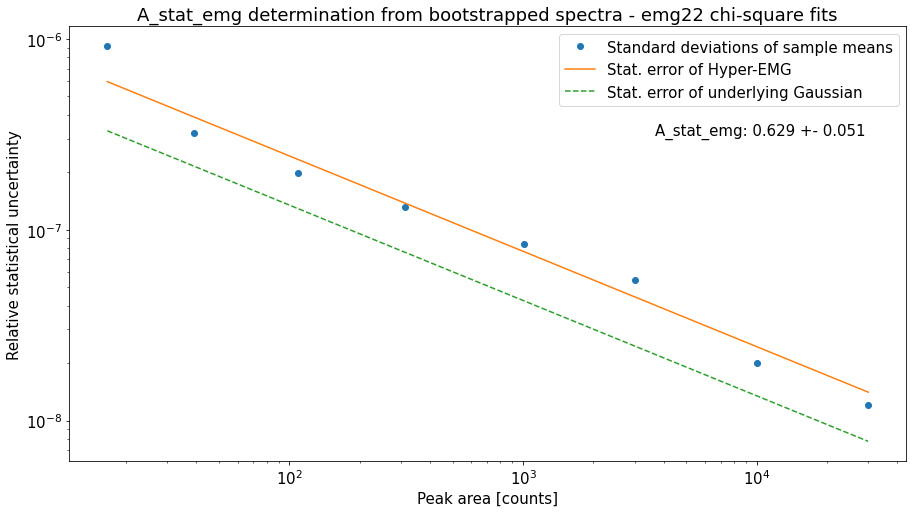

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.629 +- 0.051


In [28]:
import copy
spec_chi_sq = copy.deepcopy(spec)

# Use Pearson's chi-squared statistic for A_stat_emg determination
spec_chi_sq.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,cost_func='chi-square',N_spectra=10) 

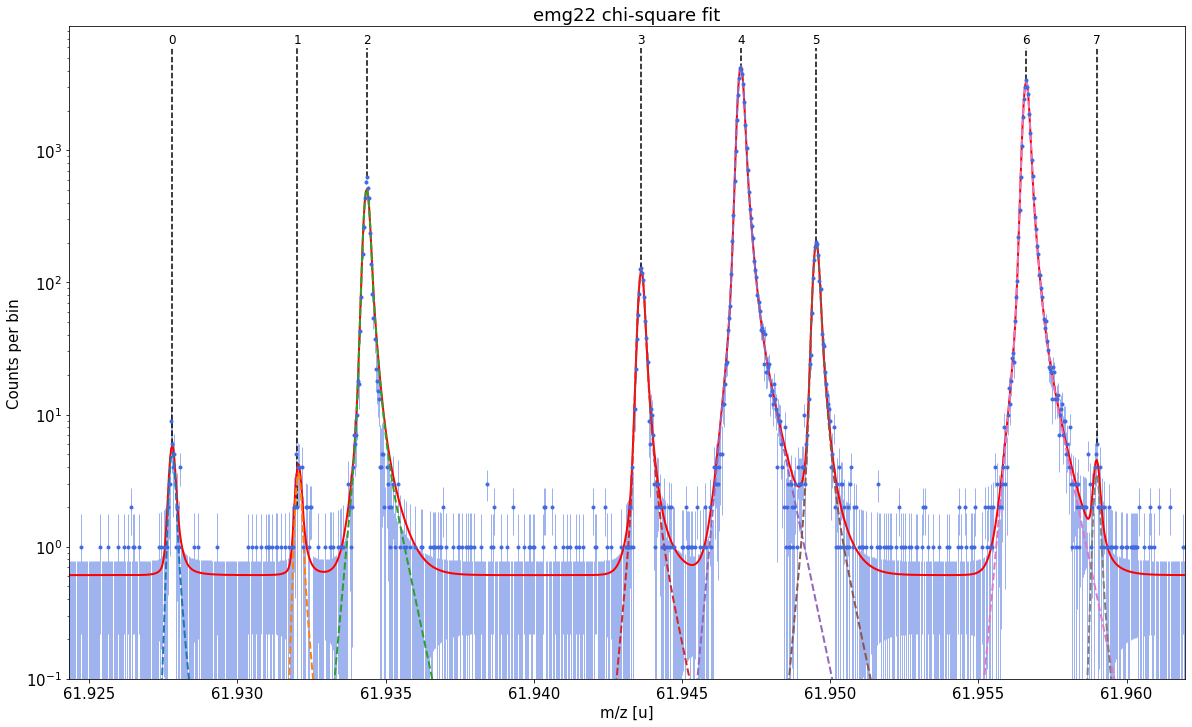

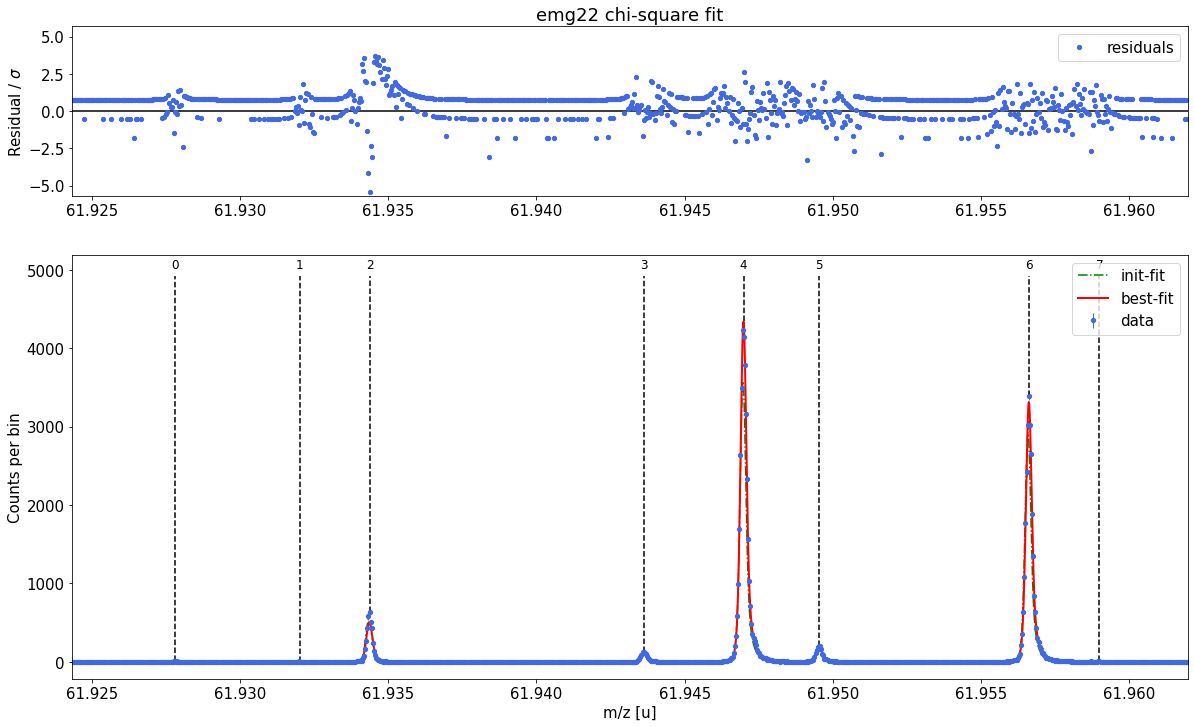


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.3e-08

Recalibration factor:      0.999999710 = 1 -2.90e-07
Relative recalibration error:  1.4e-08 


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.51581 / -0.479 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 0.679335 / -0.555 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.32189 / 0.327 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by -0.108786 / 0.103 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.044844 / 0.047 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.010156 / -0.0

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,chi-square,0.99,40.92,7.49,61.927807,3.811977e-07,1.351950e-08,2.234155e-08,3.820911e-07,62.0,-66736.708,22.041075,9.622
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,chi-square,0.99,28.22,6.66,61.932067,4.589969e-07,1.351950e-08,3.274970e-08,4.603623e-07,NaN,NaN,26.558006,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,chi-square,0.99,3990.65,63.92,61.934370,3.859671e-08,1.351950e-08,2.132427e-08,4.612166e-08,NaN,NaN,2.660828,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,chi-square,0.99,957.83,31.47,61.943635,7.877038e-08,1.351950e-08,1.242163e-08,8.088168e-08,62.0,-51992.207,4.666883,-5.295
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,chi-square,0.99,34014.37,184.70,61.946993,1.321759e-08,1.351950e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,chi-square,0.99,1573.74,40.42,61.949540,6.144680e-08,1.351950e-08,1.174502e-08,6.400337e-08,62.0,-46492.418,3.693355,5.807
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,chi-square,0.99,25965.46,161.43,61.956622,1.512579e-08,1.351950e-08,9.786474e-10,2.031069e-08,62.0,-39895.701,1.172175,0.570
7,61.958997,?,-,NaN,NaN,False,emg22,chi-square,0.99,27.46,6.98,61.958999,4.651030e-07,1.351950e-08,3.806100e-07,6.011385e-07,NaN,NaN,34.694375,NaN


In [29]:
spec_chi_sq.fit_peaks(species_mass_calib='Ti46:O16:-1e',cost_func='chi-square') # use Pearson's chi-squared statistic